# 银行客户信用风险评估项目报告

# 学生信息
        
*  学号：19200402
*  姓名： 王洪标
*  专业：人工智能
*  班级：192004

## 一、项目背景

### 1.1 项目背景

长期以来，客户的信用风险是商业银行面临的主要风险。个人信用风险管控手段落后，制约着个人消费信贷产业的发展，从而影响我国商业银行的个人消费信贷业务。在互联网技术和大数据技术的发展背景下，我们可以摒弃传统的人工审批，转而使用大数据分析来构建个人信用风险评估体系，对大量的用户数据进行分析，保证风控的效果。

### 1.2 项目目标 

通过有监督学习等方法建立个人信用风险评估模型，对客户的个人信息。消费与偿还能力和信用历史等指标进行训练，预测借贷客户是否具有违约风险，给决策者提供有效信息决定是否放贷，从而降低坏账风险。

## 二、客户数据探索与预处理 

### 2.1 数据集介绍 





> 要求：文字介绍数据的基本情况，，至少一段话；观察数据有哪些特征，并简要分析哪些字段为离散型，哪些字段为连续型？ 对于连续型特征，展示数据的均值方差等基本统计信息。


**数据基本情况**：

本项目使用的数据集为某银行客户的脱敏信用数据，记录了每位客户的个人信息、信用历史、偿债能力和消费能力等32个字段。这32个字段信息来源于公安、银行、互联网金融平台、运营商和法院等渠道，观察期为2016年6月30日到2017年6月30日。表现期为2017年7月1日到2018年6月30日。根据客户在表现期内是否有连续90天以上逾期行为定义预测特征Default，其取值为0（未违约）和1（违约）。

**数据特征**：

数据集包含47337条数据，33个字段，有字符型、整型、浮点型3种字段类型。

其中

'age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt','onlineTransCnt','publicPayAmt',
'publicPayCnt','transTotalAmt','transTotalCnt','transCnt_non_null_months','transAmt_mean','transAmt_non_null_months',
'cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months','card_age'为连续型特征；

"maritalStatus","education","idVerify","threeVerify","netLength","sex","CityId"这些特征为离散型特征。
连续型特征的均值方差等信息如下：



In [5]:
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
# 所有连续型特征列名已保存在continuous_columns中
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt',
'onlineTransAmt','onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt'
,'transCnt_non_null_months','transAmt_mean','transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months',
'cashAmt_mean','cashAmt_non_null_months','card_age']
print('连续型特征的均值为:')
print(data[continuous_columns].mean())
print('连续型特征的方差为:')
print(data[continuous_columns].var())
print(data[continuous_columns].describe())

连续型特征的均值为:
age                            35.554091
cashTotalAmt                 6109.367535
cashTotalCnt                    5.212286
monthCardLargeAmt           18371.456239
onlineTransAmt             -60959.067787
onlineTransCnt                 35.418848
publicPayAmt                  537.421360
publicPayCnt                    7.538703
transTotalAmt               46111.665040
transTotalCnt                  19.978326
transCnt_non_null_months        5.569787
transAmt_mean                5595.396328
transAmt_non_null_months        5.567252
cashCnt_mean                    1.188909
cashCnt_non_null_months         2.125927
cashAmt_mean                 1471.660381
cashAmt_non_null_months         2.114118
card_age                       24.921013
dtype: float64
连续型特征的方差为:
age                         6.715417e+01
cashTotalAmt                3.251009e+08
cashTotalCnt                9.530006e+01
monthCardLargeAmt           4.566328e+09
onlineTransAmt              1.940616e+11
onlineTransCnt      

### 2.2 探索性数据分析 

> 要求：
（1）观察是否违约客户的数据分布，画出柱状图；在本项目数据中未违约客户远多于违约客户，是否会对我们风控模型的构建产生影响？ 请谈谈你的看法。
（2）分析不同城市级别、不同文化程度、不同三要素验证情况、不同婚姻状况和不同在网时长的客户违约情况，画出如下柱状图；请简要分析一下以上五个特征不同取值的客户群体与违约情况的内在关联。
（3）对数据集中各客户的年龄和开卡时长进行统计，画出的直方图；请简要分析一下客户群体中年龄和开卡时长的分布情况。
（4）文字内容不限于上述三点，可以根据自己的理解阐述更多内容。


观察是否违约客户的数据分布，画出柱状图；

![](https://ai-studio-static-online.cdn.bcebos.com/9e05d2227e564efc982e7f6a89fd3ca7d8327a390f5c402894a7fe7bfa830f0f)

**在本项目数据中未违约客户远多于违约客户，是否会对我们风控模型的构建产生影响？ 请谈谈你的看法。**

未违约客户远多于违约客户，造成了类别的不平衡问题，两种类别对我们的模型影响能力是非常悬殊的，很有可能在预测时达到一个看上去很高的准确率，但是实际上是没有意义的虚高。所以我们应该进行一定程度的类别平衡，使得模型具有更高的鲁棒性。


**分析不同城市级别、不同文化程度、不同三要素验证情况、不同婚姻状况和不同在网时长的客户违约情况，画出如下柱状图；**

![](https://ai-studio-static-online.cdn.bcebos.com/f0648c75fb68488280ab84006832f1c4ef27aa3ac5c045f5bb7a8faf2130c34a)

![](https://ai-studio-static-online.cdn.bcebos.com/554b3fce05a140ceb8df94975d37c88dda7b60bc0929447888507ebfc23b2c0d)

![](https://ai-studio-static-online.cdn.bcebos.com/6986aa0196dc40f88980fa46843fd04528df478b22f34b81b8e74202d113f261)

![](https://ai-studio-static-online.cdn.bcebos.com/e88ac66382b14b5f84557f4f09ad9a74b7cdd9c4cf924587ac079393cb8b36e5)

![](https://ai-studio-static-online.cdn.bcebos.com/8996e8b4b5f74bb7b28646feaa208f4db0c9728dc9504fb6912683f999509a75)

**请简要分析一下以上五个特征不同取值的客户群体与违约情况的内在关联。**

从绘制出的图形中可以看到，二线城市的违约人数和违约率较一线城市和其他城市要高。可以推断的是，二线城市客户都有一定的消费能力和偿还能力，可能借贷的需求较大，同时消费水平较高，比较难平衡消费与还贷，更容易违约。而一线城市借贷需求可能没那么大，而且很多客户的薪资水平很高，偿还能力较强。而其他城市借贷需求也较大，但是偿还能力较低，所以与二线城市有着比较接近的违约率。

由绘制的图形可以看到，数据中文化程度为“初中”的违约率最低，“本科以上”违约率相对较高。我的分析是本科以上文化程度的客户对住房需求更高，有更高的生活水平追求，借贷的金额和次数都比较大。同时消费水平较高，偿还能力却与其他文化程度的客户差距不大，所以违约率较高一些。其他文化程度的违约率差距也不大，我认为关联性不大。

由图可以看到，数据中三要素不一致的客户违约率相对三要素一致的客户违约率高一些。三要素不一致的客户较有可能有虚假信息，违约率较高。

由图可以看到，数据中未婚客户相对已婚客户的违约率低一些。考虑到已婚的客户大概率需要还房贷，而且成家后可能经济压力较大，所以违约率会更高。

从直方图中可以看到，年龄和开卡时长的分布都属于偏态分布。客户年龄主要分布在25-45岁之间，客户开卡时长主要分布在0-30小时之间。



![](https://ai-studio-static-online.cdn.bcebos.com/f9c2b643066543cdb8b7859cbaf0c144cff56cbe6c644e01b366b29ac8cb407d)

![](https://ai-studio-static-online.cdn.bcebos.com/0929f7996f0540f89cb9c9ac9d56a8cc768baad6cbbe4622af8e9b46d867b7bf)

由图可知，大多数客户的年龄都在25-40之间，青年中年人居多。开卡时长主要分布在10-30月之间。

### 2.3 数据预处理 

> 要求：
（1）请简要分析一下字段缺失值的分布情况，你分别对哪些字段进行了哪些处理？有没有异常？文字介绍具体方法，并展示前后变化。
（2）请简要分析连续型特征中异常值的分布情况，结合业务场景，在项目中你分别进行了怎样的处理？
（3）请简要分析哪些特征需要进行数值编码与one-hot编码？如何操作？
（4）请对数据先进行标准化，再进行离散化，展示实现过程。
（5）文字内容不限于上述四点，可以根据自己的理解阐述更多内容。
        

(1) 

通过查看存在缺失值的特征，初步可知数据集中有6个字段存在缺失值，分别是：婚姻状况maritalStatus、教育程度education、身份验证idVerify、性别sex、三要素验证threeVerify和是否违约Default。

对于Default字段，缺失值只有两行，比例很小，可以直接删除；

对sex、maritalStatus、threeVerify、idVerify和education字段，缺失数据占有一定的比重，删除对整体数据影响较大，所以需要进行缺失值填补。可以将缺失值看作一种额外的取值，含义为未知。

缺失值处理之前：

![](https://ai-studio-static-online.cdn.bcebos.com/93b2698d4c074ea28b05e20a93ecec4e1aa77130c75c4ebc8084b67203a59253)

缺失值处理之后：

![](https://ai-studio-static-online.cdn.bcebos.com/ada2ad7dd37a4de4b4cd931fede6855765aab1a8b6d44e0ab10b30329594a0a9)


(2)

存在异常值，以犯罪记录isCrime为例，正常取值只为0、1，分别代表无/有犯罪记录，但存在6行取值为2，应进行相应的处理，对于离散型变量较常用的方法是采取众数填补。

在前面的步骤中，我们发现网上消费金额的最小值小于0，最大值特别大，可能存在异常情况。因此我们可以将网上消费金额与网上消费笔数进行对比分析。

可以发现，网上消费金额小于0的客户达到了16360名，而且大部分的网上消费笔数不为0。因此可以初步得出判断：消费金额小于0可能是正常现象。这在实际业务中也是可以解释的：网上消费既可以有花销也可以有转入金额，例如退款或银行卡转账。

从结果中，还发现存在网上消费笔数为0的客户的网上消费金额不为0，这明显不符合业务逻辑，将这些网上消费金额均修正为0。

另外，有两个客户网上消费金额在2.0e+07（2千万）以上，远高于其他客户消费金额，同时网上消费笔数达到713和714笔，远高于其它客户消费笔数。由此推断这两个可能是某机构客户，且由于和其它个人客户数据差别较大，选择将其删除，避免影响绝大多数的普通客户的数据。

公共事业缴费金额也存在异常值，有最小的达到了负的六百多万，直接将其舍去，也有很多缴费次数为0但金额不为0的数据，将其金额修改为0。最大值确实比较大，达到了290万，但是并不构成垄断性，并没有选择将其删除，我们认为该样本对数据是有参考性的。

总消费金额存在一千万以上的异常值，我们认为是机构用户，选择将其去除。还有总消费笔数超过2000的，我们也认为不符合正常客户，将其去除。保留中间的客户数据，这样处理数据对模型处理会更合适。




(3) 

在前面的步骤中我们已经分别对离散型和连续型的特征进行了缺失值和异常值的处理。

但是客户样本中很多离散型特征的取值仍为中文，如婚姻状况列的取值为未婚、已婚、未知。在建立模型之前，我们需要对这些值进行数字编码，将中文类别映射为对应的数字。

需要数字编码的特征有：

婚姻状况、城市级别、身份验证、文化程度、在网时长、三要素验证、性别

将maritalStatus列中的值进行映射：未知映射为0，未婚映射为1，已婚映射为2

将education列中的值进行映射：未知映射为0，小学映射为1，初中映射为2，高中映射为3，本科以上映射为4

将idVerify列中的值进行映射：未知映射为0，一致映射为1，不一致映射为2

将threeVerify列中的值进行映射：未知映射为0，一致映射为1，不一致映射为2

将netLength列中的值进行映射：无效映射为0，0-6个月映射为1，6-12个月映射为2，12-24个月映射为3，24个月以上映射为4

将sex列中的值进行映射：未知映射为0，男映射为1，女映射为2

将CityId列中的值进行映射：一线城市为1，二线城市为1，其它映射为3

需要one-hot编码的特征与数字编码的相同，但数字编码给离散型特征的取值引入了原本不存在的次序关系，如已婚(映射数字2)是未婚(映射数字1)的两倍。

为了解决这个问题，我们采用One-Hot编码来消除这种次序关系。One-Hot编码将包含K个取值的离散型字段转换成K个取值为0或1的二元特征。

方法：不保留原始字段，只保留One-Hot后的新字段，且One-Hot编码后的字段命名规则为maritalStatus_0，maritalStatus_1，maritalStatus_2......原始的列经过One-Hot编码转换成了对应新的列。





（4）

标准化的实现：

将data中所有的连续型数据进行z-score标准化，将连续型数据全部映射到[0,1]的区间内，方差为1。

离散化的实现：

对data中所有数值连续型的列continuous_columns利用qcut进行等频离散化，将每一列都离散为5组，设置duplicates为drop以删除非唯一值

结果展示：

![](https://ai-studio-static-online.cdn.bcebos.com/d7f77961b1ba4ecba77fb7d74fd1ae842e1eb9ea34434968811bb4945c8b3a37)


(5)

在处理过程中，我们发现数据集中并未检测出缺失值，打开数据集研究发现，所有的缺失值都用'None'表示，故无法检测。将所有None替换为'NaN'之后，才正常读出缺失值。


## 三、建立信用评估指标体系 

> 要求：文字描述为什么建立信用评估指标体系？建立什么指标？如何计算？比较模型性能，分析这些指标对模型的影响。


在上一部分中，我们对数据进行了详细的预处理，接下来我们则需要通过建立指标体系来对不同的字段进行分类，这也为下一步的建模工作做准备。参照国际信用评分指标体系的建立方式，我们开始建立信用评估指标体系。

指标体系分为个人信息、信用历史、偿债能力、消费能力四大指标类。为了更详细的刻画客户的信用信息，还可以根据已有指标来建立一些新的指标，例如“不良记录”、“平均每笔取现金额“等等。

新增的指标包括：

    构造客户的年消费总额，对该客户的消费能力进行初步判断：

      年消费总额=年消费笔数均值×年消费金额均值
  
    构造客户的年取现总额，从侧面评估该客户的总资产：

      年取现总额=年取现笔数均值×年取现金额均值
  
    构造客户平均每笔取现金额，评估客户在资产方面是否具有稳定性：

      平均每笔取现金额=总取现金额/总取现笔数
  
    构造客户网上平均每笔消费金额，评估客户的网络消费习惯：

      网上平均每笔消费额=网上消费金额/网上消费笔数
  
    消费与收入息息相关，构造公共事业平均每笔缴费额，可以更好地衡量客户的消费支出情况：

      公共事业平均每笔缴费额=公共事业缴费金额/公共事业缴费笔数
  
    构造客户的不良记录评分，不良记录越多，分数越高，可以更好地评估客户信用风险：

      不良记录=法院失信传唤记录+有无逾期记录+有无犯罪记录+黑名单接口记录不良记录

指标对模型的影响：

年取现总额对模型的影响较大，在分类器中表现出来的权重更高；同时，年消费总额、平均每笔取现金额和网上平均每笔消费金额对模型的影响相对来说也比较大。

## 四、风控模型的构建与效果评估 

### 4.1 风控模型的构建 
使用分层采样的方法，按照  8:2  将客户数据集随机划分为训练集与测试集；使用逻辑回归、随机森林等多种算法，分别构建风控模型，并使用正则化、网格搜索和交叉验证等方式对模型参数进行调优。
> 要求：文字描述该过程，展示结果并进行分析。

### 4.2 风控模型的效果评估 
本项目主要从准确性、稳定性和可解释性三个方面来评估模型，其中准确性指标包括感受性曲线下面积 (ROC_AUC) 和区分度指标 (KS) 。
> 要求：文字描述该过程，展示结果并进行分析。





***风控模型的构建：***

在对数据进行缺失值填补、异常值检测，以及通过可视化查看各特征分布以及特征之间关系之后，我们基于信用指标体系，开始构建风控模型。

**构建模型的流程为：**

按照8:2将客户数据集随机划分为训练集与测试集；

使用逻辑回归和随机森林两种算法，分别构建风控模型；

使用正则化、网格搜索、交叉验证等方式对模型参数进行调优。

**1.训练集与测试集划分**

    先将data数据分离为x, y，再使用Sklearn中的model_selection模块的train_test_split()函数进行划分，且使得训练集和测试集中违约样本的比例保持一致。
    其中测试集比例为0.2，返回的变量命名为x_train, x_test, y_train, y_test。
    处理类别不平衡问题，得到新的数据x_train_new, x_test_new, y_train_new, y_test_new。
    其中，使得训练集和测试集中违约样本比例一致的方法是：设置train_test_split的参数stratify = y；
    而处理类别不平衡时，我的处理方法是：安装并导入imblearn库，调用其中的SMOTE函数，对数据量过小的类别进行过采样。在测试过程中我们发现，将SMOTE参数sampling_strategy设置为0.25是比较合适的，也就是说使得未违约样本数为违约样本数的四倍。SMOTE函数默认将占比较小的一类按照一定的规则过采样，使得未违约和违约样本的数据量保持1:1，但是在测试中发现，这样大规模地扩大违约样本数，即使SMOTE采用的不是简单的叠加，依然会影响到模型的实际分类能力，甚至我们猜测对模型的训练造成了过拟合——准确率一度达到了99%以上，我们认为这是不符合实际的。
    
**2.逻辑回归风险评估模型构建及评估**

  使用sklearn的LogisticRegression函数构建模型，带入训练集进行训练。
  
  对测试集进行预测，计算并输出accuracy、AUC值。
  
  在没有进行参数调优时，结果如下：
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/41022198b99a4735b8a892945f178ce8b0e50a3112c4443b8bdc63b687a6abd9)
 
 
 接下来我们进行逻辑回归的参数调优：
 
 调优结果为：
 
 penalty = 'l2',class_weight = 'balanced',max_iter=100,solver = 'liblinear',C=0.7
 
 训练预测：
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/95801612cbed41a8b0d499c04bb332cadd2196f58e2747dab4b7c378389c782c)
 
 
 
**3.随机森林风险评估模型构建及评估**

 在进行随机森林风险评估模型的构建之前，我们已经进行了数据的标准化和连续型特征的离散化，所以我们预测此时用随机森林训练的效果应该会比较好。
 
 使用sklearn的RandomForestClassifier构建模型，带入训练集进行训练。
 
 对测试集进行预测，计算并输出accuracy、AUC值。
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/14b41f02294245a2a4446c01b336833a6f35f8ce49cd4040aa531a4d20288ed2)
 
 
 上一步我们没有进行任何的调参，下面对随机森林参数进行调优： 我们先对随机森林的n_estimators进行调优，n_estimators表示随机森林中决策树的数目。

(1)设置参数n_estimators的取值范围为区间[20,200]，通过每隔20取一个数值，计算不同取值时模型的AUC值。

(2)绘制在不同n_estimators下AUC取值的折线图，取值设置为x轴，AUC值设置为y轴，观察图形即可得到相对最优的n_estimators。

(3)使用调优的参数对训练集进行训练，测试集进行预测，计算并输出accuracy、AUC值。

  在这里我们设置了一个循环，以n_estimators为循环变量从20,200进行循环，不断地训练预测并画出ROC曲线，在比较中我们得到结论：当n_estimators为100时准确率最高。


*使用网格搜索进行随机森林参数调优*

在机器学习建模时，通常待调节的参数有很多，参数之间的组合更是繁复。人力手动调节注意力成本太高，使用循环的方法受限于太过分明的层次，不够简洁与灵活且易出错。 

我们可以借助sklearn中model_selection模块的GridSearchCV()函数进行网格搜索调参，它能够在指定的范围内自动搜索具有不同参数的不同模型组合，有效的解决了手动调参的问题。

下面我们对随机森林的决策树数目n_estimators和决策树最大深度max_depth两个参数进行调试。

设置网格搜索各项参数的取值列表，如：{'n_estimators': [160,180,200],'max_depth': [6,8,10]}。

对随机森林模型使用GridSearchCV()方法，评分方式scoring设置为roc_auc，并行运行的作业数n_jobs设置为2，交叉验证参数cv设置为5。

对测试集进行预测，计算并输出accuracy、AUC值。

通过网格搜索，我们用print(grid_search.best_params_, grid_search.best_score_)代码找到了最佳的参数：

![](https://ai-studio-static-online.cdn.bcebos.com/c32b2eb0d10943619bf7cbb0a238d65d7c19f1aa3daf4ffa9411de1f15f500c1)

用此参数训练模型得到的结果为：

![](https://ai-studio-static-online.cdn.bcebos.com/82606e049f484984872752964a3d71cf139ca07d65ab45bea9a2ef6f80a637ab)



**使用多层感知机（Multi-Layer Perception,MLP）模型进行评估**

![](https://ai-studio-static-online.cdn.bcebos.com/a24b00bf775b49c183d599876ecbf04da270de4c1fa94fd1a74ee33a1a3bd28f)

未调参之前：

![](https://ai-studio-static-online.cdn.bcebos.com/0ca93b7cb34f435598fc6c44a242de6a753509bbe85b4c5a9f6ba216b34fa3be)


参数的调优：

olver='adam', 

activation='logistic',

verbose = True,

hidden_layer_sizes=[10,10,10],

random_state=0,

warm_start = True,

early_stopping = True

调参后的结果：

![](https://ai-studio-static-online.cdn.bcebos.com/e6b5a0800d344bc28b24e7622348f5773650b4afddf4419f965f1b781fc59c4d)





***风控模型的效果评估***


**ROC曲线与AUC**

前面我们对ROC曲线和AUC进行了简单的介绍，并且在上一部分中已经通过调节参数得到了最优的逻辑回归模型。

这里我们首先绘制出这个最优模型的ROC曲线，然后计算出AUC值，以此来评估其准确性。

使用metrics.roc_curve函数计算出 fpr及tpr和threshold（测试集真实标签 y_test, 测试集预测概率y_predict_best）。

使用metrics.auc函数求出 AUC的值（在函数括号中按顺序填入fpr 及 tpr）。

使用matplotlib的pyplot模块绘制ROC曲线，设置横纵坐标的范围（0-1），并且画一条红色的对角线与ROC曲线进行参照对比。

在ROC曲线右侧，绘制PR曲线进行比对，标记Precision与Recall的平衡点。


**逻辑回归的RUC曲线、PR曲线、KS值和PSI：**

 ![](https://ai-studio-static-online.cdn.bcebos.com/e4bedba361ee4858b42eb72fafb2a0870fff033373544daa932a93c74fc795bc)
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/ed7d165002944dc5b0bf81ef9f893a06ee23c23a5ed8440ba1cacf26c6a51bcf)
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/3329f029990f4a17819a3650926ea4cf5af252ef3e354c9987dde0c7957213fe)
 
 
 
 
 **随机森林的RUC、KS和PSI：**
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/6987379c88024995a4027ac11f30f72ed15e24fb31c1413aaeb19790af33b115)
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/e10c24b82712472da7aea460811a27388fece71325fc4aa1b1ea409ebbab215a)
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/9bcb25a2258a4d2c901fbd38ba6826510437de2eb9134873ae3eedd6ddd3fce0)
 
 
 
 **神经网络的RUC、KS和PSI**
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/595c36acfb71468191bd95f9aad6de8a9ebddcb995094e67810203635425e979)
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/ae9d61504c4b407095f26a7106b5c1489537a40bb9a441f480fd08871e2020bc)
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/267dbe61beaa407b990b79952c7eab68c39ccade04d541ff8e3ef3d06c614c6f)
 
 
 
 **逻辑回归模型的指标重要性排序：**
 
 在这里我们使用了eli5.sklearn的'PermutationImportance'方法，将权重排在前列的特征绘制出来
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/eb26dd97c6534b0ba817b492d1c40978f30958682f80464f9bb408900bfeebb2)
 


**随机森林模型的指标重要性排序：**
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/8902f4fa9ab648cc8975c1beefc7267f42c566e0bac04aa08f8e99f966934412)
 
 
 
 **神经网络模型的指标重要性排序：**
 
 ![](https://ai-studio-static-online.cdn.bcebos.com/78fcda6d4344408eb876654cd8cc3c20d042893899774b9c8ad0dc4e59332d3d)
 


***结果分析***

**准确性：**

三种模型的准确率和AUC值都达到了95%和94%以上，随机森林和神经网络调参后甚至达到了97%以上，由此可见我们的模型准确率是比较高的。需要注意的是，类别不平衡问题对准确率具有一定的影响。在正式训练之前，我们已经用SMOTE方法对违约数据进行了过采样，经过比对，处理前后的准确率确实存在一定的差距。从绘制出的RUC曲线可以看出，AUC值确实很高，分类性能很好。

三种模型的KS值分别为：72.47 %，90.2 %和76.05 %，随机森林模型的KS值很高，或许有问题，但是鉴于我们预测的高准确率结果，这也许是可以解释的。KS值高说明我们的风控模型对正常和违约用户的区分能力较强。

**稳定性：**

根据绘制出的PSI图表和输出的PSI值，可以看出我们的模型具有很高的稳定性。

**可解释性：**

我们考量了各个解释变量对目标变量预测结果的影响程度，得到了模型指标重要性。可以很直观地看出每个对模型预测重要性较高的特征。






## 五、项目总结与心得体会 

### 5.1 项目总结
> 要求：请从项目目标、项目流程、数据处理方法、风控模型构建方法、效果分析和初步结论等方面对本项目进行总结。

#### 项目目标：解决了什么样的实际问题？
我们的项目是通过有监督学习等方法建立个人信用风险评估模型，对客户的个人信息。消费与偿还能力和信用历史等指标进行训练，预测借贷客户是否具有违约风险，给决策者提供有效信息决定是否放贷，从而降低坏账风险。

#### 项目流程：项目的总体执行流程是怎样的？
首先，明确项目的基本任务，对数据进行一个整体的观察与分析，掌握数据的基本信息和特征，了解数据与项目任务的关系，从而更深入的了解我们的业务场景。

其次，进行数据的探索与分析，对数据进行预处理。包括离散型特征和连续型特征的缺失值和异常值处理，以及离散型特征的数字编码和one-hot编码。

然后，参照国际信用评分指标体系的建立方式，建立信用评估指标体系，并建立我们的风控模型。

最后，对我们的风险评估模型进行预测及分析，得到直观的模型预测分析结果。

#### 数据处理方法：对项目数据进行了怎样的处理？
对离散型特征和连续型特征进行了缺失值和异常值的处理，其中某些缺失值过多的离散型变量填充为'未知'，连续型特征的缺失值和异常值需要根据实际情况进行分析处理。对离散型特征还进行了数字编码和one-hot编码，取代中文编码，并且消除本不该存在的次序关系。在训练模型之前，我们还进行了数据的标准化和连续型特征的离散化，消除奇异样本数据导致的不良影响，并且有效的离散化能减小算法的时间和空间开销，提高系统对样本的分类聚类能力和抗噪声能力。

#### 风控模型构建方法：使用哪些方法构建风控模型？
1.参数调优的逻辑回归模型

2.基于网格搜索调参的随机森林模型

3.基于多层感知机的神经网络模型
#### 效果分析：使用哪些方法对风控模型的效果进行了分析和评估？
1.模型预测的准确率、神经网络的性能分数

2.AUC值、绘制RUC曲线

3.绘制KS曲线和输出PSI(population stability index)

#### 初步结论：通过本项目，得到了哪些初步的结论？

总的来说，该项目整体取得不错的成果，数据的处理和模型的建立都有不错的效果，具有一定的实际应用能力，可信度较高。
不过数据量和模型复杂度都处于一个适中的情况，未来需要对海量数据进行分析处理时可能需要更加复杂的模型，需要进一步的探索实现。

### 5.2 心得体会

> 要求：在该项目实训过程中，遇到了哪些问题？你是如何解决这些问题的？经过本次综合实训，你的最大收获是什么？经过本次综合实训，你有哪些体会？


**一、遇到的问题：**

1.数据的处理问题：无法检测出缺失值，于是我们观察数据集本身，发现所有的缺失值都是用'None'表示，而python的缺失值检测检查的是'NaN'，于是我们将数据集中的'None'全部替换为'NaN'，缺失值才得以成功处理；

2.使用matplotlib进行画图时，图上的中文字体无法正确显示。于是我们手动下载了'SimHei.tff'文件，将其导入到该项目下，但是发现依然无法显示。尝试使用fontmanager方法，但无法适用于所有情况。经过资料查询，我们使用命令将该字体导入到font目录下，然后清理matplot缓存，再次运行，成功显示中文字体；

    具体代码为：

    #创建字体目录fonts

    !mkdir .fonts

    #复制字体文件到该路径

    !cp font/SimHei.ttf .fonts/

    import matplotlib.font_manager as font_manager

    %matplotlib inline

    font_manager._rebuild()

    #不是系统安装了字体就能在 Seaborn 和 Matplotlib 中使用，需要先更新 Matplotlib 的字体缓存
    
3.使得训练集和测试集中违约样本的比例保持一致的参数：设置train_test_split方法的参数stratify = y

4.使用to_csv保存到新文件时，发现文件数据最前面都会多一列0.在参数中加入index=False即可

5.类别不平衡问题的处理：使用SMOTE过采样方法。

具体代码为：

    smote = SMOTE(sampling_strategy=0.25,random_state=42)
    x_train_new,y_train_new = smote.fit_resample(x_train,y_train)
    x_test_new,y_test_new = smote.fit_resample(x_test,y_test)
    
6.MLP神经网络指标重要性的显示方法：使用了eli5库中的PermutationImportance方法，输出排名靠前的指标及其权重

具体代码为：
    
    import eli5
    from eli5.sklearn import PermutationImportance
    perm = PermutationImportance(mlp,random_state = 1).fit(x_test,y_test3)
    eli5.show_weights(perm,feature_names = x_test.columns.tolist())

**二、收获与体会**

对于我而言，最大的收获就是将所学的机器学习理论知识应用与实际项目中，对数据预处理、模型建立与调参、模型训练与分析具有了一定的了解。此外，我还锻炼了基于Python的代码能力，同时遇到不会的方法时资料的搜集筛选能力也有了一定的进步。
由于是小组项目，我们组对于很多问题进行了高度和深度并存的讨论,在一些问题上甚至有不同的意见，相互交流想法得到最优的方案。这对我们以后的协同工作能力也是一定的锻炼。


# 六、完整项目代码整理

> 格式要求：任务说明+代码及关键代码注释+自动运行处的结果（不需要手工截图结果）


## 1.数据描述与分析

### 1.1 查看数据基本情况


In [23]:
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)

# 可使用head()函数查看data数据前五行
data_5 = data.head()

print(data_5)

  CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0   一线城市    0  38.0         2           0.0                        0   
1   一线城市    0  39.0        19           0.0                        0   
2   二线城市    0  40.0        16           0.0                        0   
3     其它    0  38.0        13       22000.0                        1   
4   二线城市    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
0           0.0                        0             0             0  ...   
1           0.0                        0             0             0  ...   
2           0.0                        0             0             0  ...   
3           6.0                        1         22000             6  ...   
4           0.0                        0             0             0  ...   

  publicPayCnt sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0          0.0   女          

In [24]:
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
# 请调用info()函数
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47337 entries, 0 to 47336
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CityId                    47337 non-null  object 
 1   Han                       47337 non-null  int64  
 2   age                       47337 non-null  float64
 3   card_age                  47337 non-null  int64  
 4   cashAmt_mean              47337 non-null  float64
 5   cashAmt_non_null_months   47337 non-null  int64  
 6   cashCnt_mean              47337 non-null  float64
 7   cashCnt_non_null_months   47337 non-null  int64  
 8   cashTotalAmt              47337 non-null  int64  
 9   cashTotalCnt              47337 non-null  int64  
 10  education                 44323 non-null  object 
 11  idVerify                  21555 non-null  object 
 12  inCourt                   47337 non-null  int64  
 13  isBlackList               47337 non-null  int64  
 14  isCrim

In [25]:
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
# 使用describe()函数查看数据整体的基本统计信息
data_des = data.describe()

print(data_des)

                Han           age      card_age  cashAmt_mean  \
count  47337.000000  47337.000000  47337.000000  47337.000000   
mean       0.038427     35.554091     24.921013   1471.660381   
std        0.192226      8.194765     17.027043   2892.147589   
min        0.000000     19.000000      0.000000      0.000000   
25%        0.000000     29.000000     12.000000      0.000000   
50%        0.000000     34.000000     22.000000    460.000000   
75%        0.000000     41.000000     33.000000   1820.269817   
max        1.000000     62.000000     86.000000  72633.333330   

       cashAmt_non_null_months  cashCnt_mean  cashCnt_non_null_months  \
count             47337.000000  47337.000000             47337.000000   
mean                  2.114118      1.188909                 2.125927   
std                   2.597253      1.364354                 2.605969   
min                   0.000000      0.000000                 0.000000   
25%                   0.000000      0.000000     

### 1.2 可视化是否违约(Default)特征的取值分布

In [29]:
#创建字体目录fonts
!mkdir .fonts

# 复制字体文件到该路径
!cp SimHei.ttf .fonts/

import matplotlib.font_manager as font_manager
%matplotlib inline
font_manager._rebuild()
#不是系统安装了字体就能在 Seaborn 和 Matplotlib 中使用，需要先更新 Matplotlib 的字体缓存

#### 违约与未违约数量分布图

[43078  4257     2]


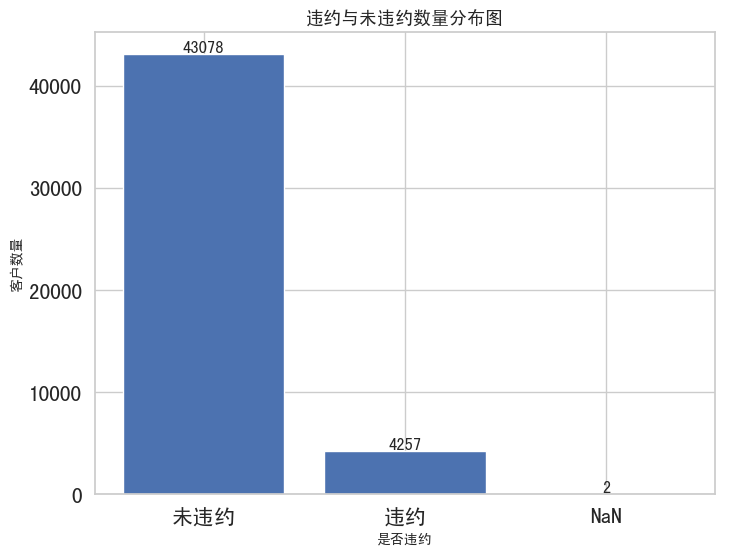

In [27]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


#设置显示中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False


data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0

# 在柱形上方显示计数
counts = data['Default'].value_counts(dropna=False).values
print(counts)
for index, item in zip([0,1,2], counts): 
    plt.text(index, item, item, ha="center", va= "bottom", fontsize=12) 

# 绘制柱状图，查看违约关系的取值分布情况
plt.xlabel('是否违约',fontsize=10)
plt.ylabel('客户数量',fontsize=10)
x_axis = ['未违约','违约','NaN']
y_axis = counts
plt.title('违约与未违约数量分布图',fontsize=13)
plt.bar(x_axis,y_axis)
plt.show()

#### 不同城市级别违约率分布柱状图

CityId
一线城市    0.077955
二线城市    0.097914
其它      0.096416
Name: Default, dtype: float64


Text(0,0.5,'违约率')

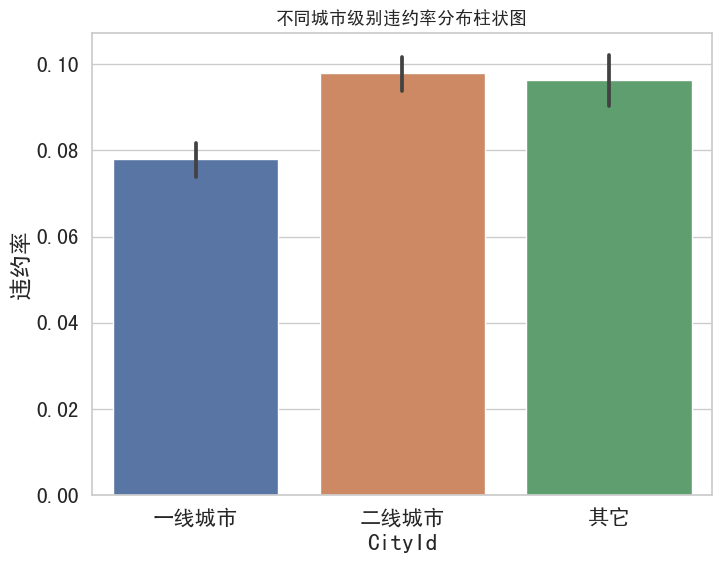

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0
# 对CityId列的类别设定顺序
data['CityId'] = data['CityId'].astype('category')
data['CityId'] = data['CityId'].cat.set_categories(['一线城市', '二线城市', '其它'],ordered=True)

#设置显示中文
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False

# 计算不同城市级别的违约率
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
cityid_rate = data.groupby('CityId')['Default'].sum() / data.groupby('CityId')['Default'].count()
print(cityid_rate)

# 绘制柱状图，查看不同城市级别的违约率分布
rc = {'font.sans-serif':['SimHei']}
sns.set(style="whitegrid",rc=rc,font_scale=1.4)

p=sns.barplot(x="CityId",y="Default",data=data)
p.set_title('不同城市级别违约率分布柱状图',fontsize=13)
p.set_ylabel('违约率')




#### 不同文化程度下违约率分布柱状图

Text(0,0.5,'违约率')

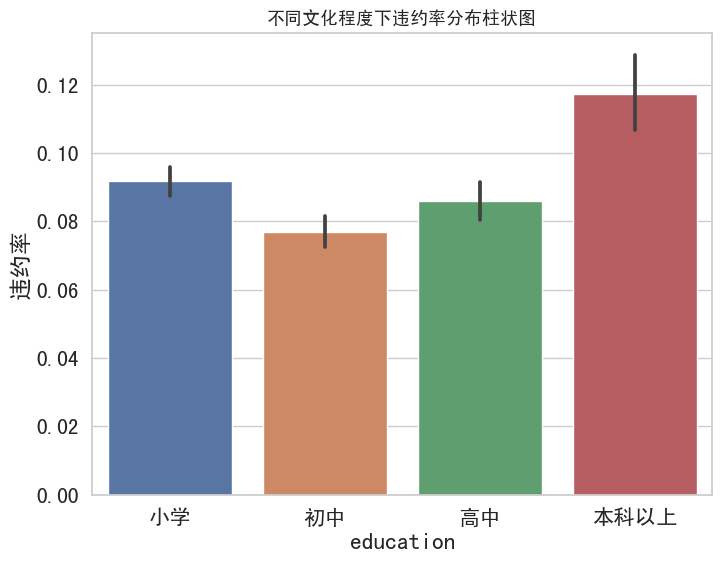

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0
# 对education列的类别设定顺序
data['education'] = data['education'].astype('category')
data['education'] = data['education'].cat.set_categories(['小学', '初中', '高中', '本科以上'],ordered=True)

# 先计算不同文化程度客户群体的违约率，再绘制违约率的柱状分布图
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
education_rate = data.groupby('education')['Default'].sum() / data.groupby('education')['Default'].count()
education_rate

p=sns.barplot(x="education",y="Default",data=data)
p.set_title('不同文化程度下违约率分布柱状图',fontsize=13)
p.set_ylabel('违约率')

#### 不同三要素验证下违约率分布柱状图

threeVerify
一致     0.088175
不一致    0.096999
Name: Default, dtype: float64


Text(0,0.5,'违约率')

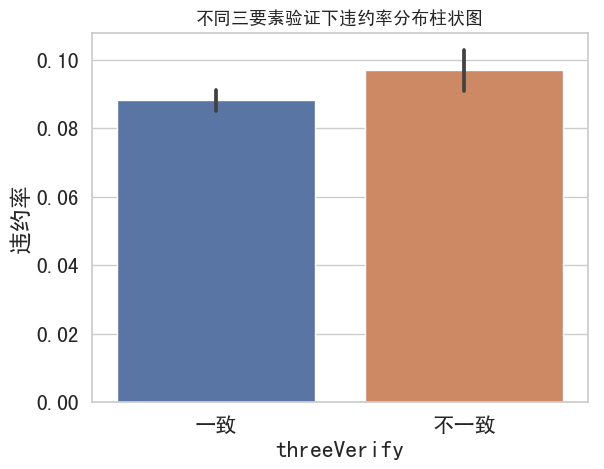

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
#fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))
data.loc[data['Default'] == '0.0','Default'] = 0
# 对threeVerify列的类别设定顺序
data['threeVerify'] = data['threeVerify'].astype('category')
data['threeVerify'] = data['threeVerify'].cat.set_categories(['一致','不一致'],ordered=True)

# 先计算不同三要素验证客户群体的违约率，再绘制不同三要素验证违约率分布柱状图
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
threeVerify_rate = data.groupby('threeVerify')['Default'].sum() / data.groupby('threeVerify')['Default'].count()
print(threeVerify_rate)

p=sns.barplot(x="threeVerify",y="Default",data=data)
p.set_title('不同三要素验证下违约率分布柱状图',fontsize=13)
p.set_ylabel('违约率')

#### 不同婚姻状况下违约率分布柱状图

maritalStatus
未婚    0.084386
已婚    0.093665
Name: Default, dtype: float64


Text(0,0.5,'违约率')

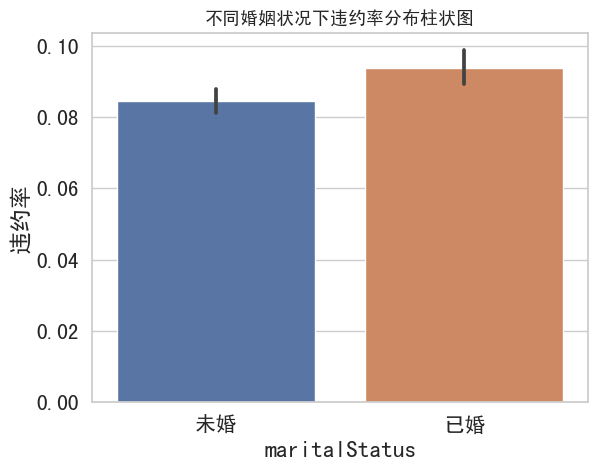

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
#fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))
data.loc[data['Default'] == '0.0','Default'] = 0
# 对maritalStatus列的类别设定顺序
data['maritalStatus'] = data['maritalStatus'].astype('category')
data['maritalStatus'] = data['maritalStatus'].cat.set_categories(['未婚','已婚'],ordered=True)

# 先计算不同婚姻状况客户群体的违约率，再绘制违约率的柱状分布图
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
maritalStatus_rate = data.groupby('maritalStatus')['Default'].sum() / data.groupby('maritalStatus')['Default'].count()
print(maritalStatus_rate)

p=sns.barplot(x="maritalStatus",y="Default",data=data)
p.set_title('不同婚姻状况下违约率分布柱状图',fontsize=13)
p.set_ylabel('违约率')

#### 不同在网时长下违约率分布柱状图

netLength
0-6个月      0.033138
6-12个月     0.027415
12-24个月    0.087177
24个月以上     0.113299
无效         0.045623
Name: Default, dtype: float64


Text(0,0.5,'违约率')

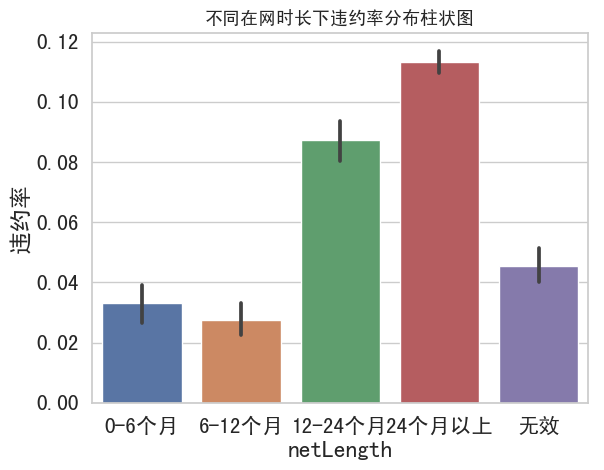

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
data.loc[data['Default'] == '0.0','Default'] = 0
# 对netLength列的类别设定顺序
data['netLength'] = data['netLength'].astype('category')
data['netLength'] = data['netLength'].cat.set_categories(['0-6个月','6-12个月','12-24个月','24个月以上','无效'],ordered=True)

# 先计算不同在网时长客户群体的违约率，再绘制违约率的柱状分布图
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
netLength_rate = data.groupby('netLength')['Default'].sum() / data.groupby('netLength')['Default'].count()
print(netLength_rate)

p=sns.barplot(x="netLength",y="Default",data=data)
p.set_title('不同在网时长下违约率分布柱状图',fontsize=13)
p.set_ylabel('违约率')

### 1.3 连续性特征分布及其相关性分析

#### 总消费金额的分布、与总消费笔数的关系

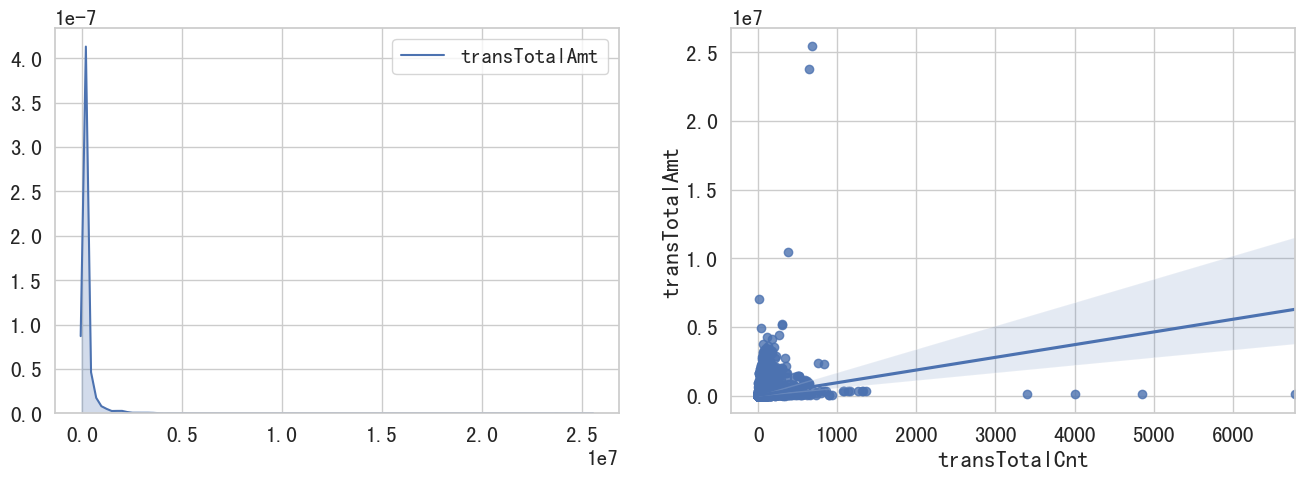

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
# 建立画布ax1和ax2,及设置图像大小，设置subplots()函数中参数为(1,2)表示两画图呈一行两列
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 5))

# 在画布ax1中画出总消费金额的核密度图
sns.kdeplot(data['transTotalAmt'],shade=True,ax=ax1)

# 在画布ax2中画出总消费笔数和总消费金额的回归关系图
sns.regplot(x='transTotalCnt',y='transTotalAmt',data=data,ax=ax2)


#### 总取现笔数(cashTotalCnt)和总取现金额(cashTotalAmt)的关系

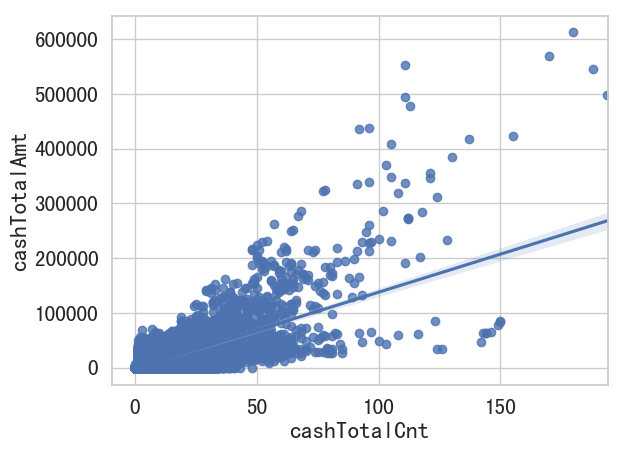

In [37]:
sns.regplot(x='cashTotalCnt',y='cashTotalAmt',data=data)

#### 年龄和开卡时长分布

Text(0.5,1,'开卡时长分布')

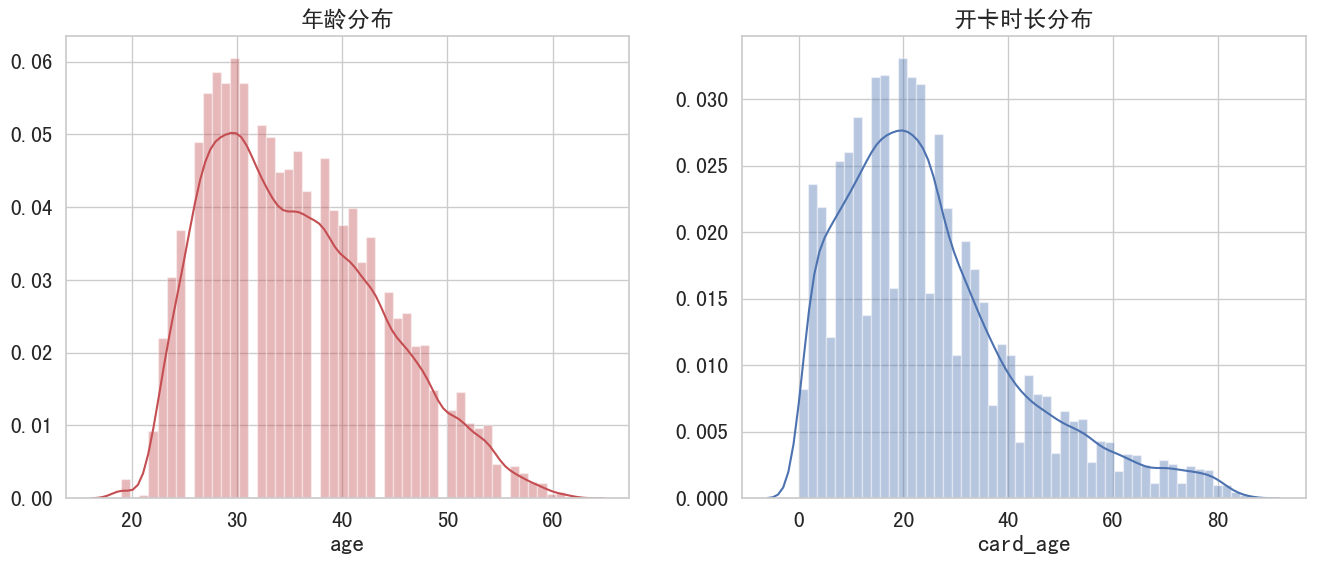

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
# 建立画布ax1和ax2,及设置图像大小，设置subplots()函数中参数为(1,2)表示一行两列
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))

# 在画布ax1中绘制年龄的直方图，颜色为红色
sns.distplot(a=data['age'],color='r',kde=True,ax=ax1)
ax1.set_title('年龄分布')

# 在画布ax2中绘制开卡时长的直方图，颜色为默认值
sns.distplot(a=data['card_age'],kde=True,ax=ax2)
ax2.set_title('开卡时长分布')

## 2.数据探索分析

### 2.1 离散型特征检查

#### 查看存在缺失值的特征

In [39]:
import pandas as pd
import numpy as np
data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
# 计算特征缺失值个数
na_counts = data.isnull().sum()
# 将na_counts取大于0的部分进行降序排序
missing_value = na_counts[na_counts>0].sort_values(ascending = False)
# 查看存在缺失值的特征
print(missing_value)

idVerify         25782
maritalStatus     7493
threeVerify       3494
education         3014
sex                163
Default              2
dtype: int64


#### 离散型特征的缺失值处理

In [40]:
import pandas as pd

data = pd.read_table('dataset.txt',sep=' ',low_memory=False)
# 缺失值处理
data = data.dropna(axis = 0,how = 'any',subset = ['Default'])
data.fillna(value = '未知',inplace = True)
print(data)
# 查看存在缺失值的特征
na_counts = data.isnull().sum()
print(na_counts)
missing_value = na_counts[na_counts>0].sort_values(ascending = False)
print(missing_value)

# 保存更新后的data到dataset_new.txt
data.to_csv('dataset_new.txt',sep=' ',index=False)

      CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0       一线城市    0  38.0         2           0.0                        0   
1       一线城市    0  39.0        19           0.0                        0   
2       二线城市    0  40.0        16           0.0                        0   
3         其它    0  38.0        13       22000.0                        1   
4       二线城市    0  24.0         8           0.0                        0   
...      ...  ...   ...       ...           ...                      ...   
47332   一线城市    0  43.0        20        4613.0                        7   
47333   一线城市    0  40.0        25           0.0                        3   
47334   一线城市    0  47.0        19        4595.0                        4   
47335   二线城市    0  49.0        16           0.0                        7   
47336   二线城市    0  42.0        17         786.0                        3   

       cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
0     

#### 离散型特征的异常值处理

In [41]:
import pandas as pd
import numpy as np
data = pd.read_table('dataset_new.txt',sep=' ',low_memory=False)

# 异常值处理
#data['isCrime'].loc[data['isCrime']>1] = np.nan
#data['isCrime']=data['isCrime'].fillna(data['isCrime'].mode())  链式赋值警告，故弃用
data['isCrime'].replace(2,data['isCrime'].mode()[0],inplace = True)
# 查看处理后的数据情况
print(data['isCrime'].value_counts())

# 分别打印其他离散型特征的取值，判断是否有异常值
def classify(dataframe):
    for i in dataframe.columns:
        if data[i] .dtypes == object:
            print(data[i].value_counts())
            
classify(data)         

# 保存更新后的data到dataset_new2.txt
data.to_csv('dataset_new2.txt',sep=' ',index=False)

0    46553
1      782
Name: isCrime, dtype: int64
二线城市    19323
一线城市    18190
其它       9822
Name: CityId, dtype: int64
小学      18824
初中      13778
高中       8463
本科以上     3256
未知       3014
Name: education, dtype: int64
未知     25780
不一致    13573
一致      7982
Name: idVerify, dtype: int64
未婚    24767
已婚    15075
未知     7493
Name: maritalStatus, dtype: int64
24个月以上     28385
12-24个月     6917
无效          4866
6-12个月      3757
0-6个月       3410
Name: netLength, dtype: int64
男     26530
女     20642
未知      163
Name: sex, dtype: int64
一致     34511
不一致     9330
未知      3494
Name: threeVerify, dtype: int64


### 2.2连续型特征检查

#### 查看连续型特征的取值

In [42]:
#打印最大值
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt','onlineTransCnt',
'publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt','transCnt_non_null_months','transAmt_mean',
'transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months','card_age']
a = []
for item in continuous_columns:
    a.append(max(data[item]))
pd.Series(a,index=continuous_columns)

age                         6.200000e+01
cashTotalAmt                6.119000e+05
cashTotalCnt                1.940000e+02
monthCardLargeAmt           4.737770e+06
onlineTransAmt              2.464593e+07
onlineTransCnt              6.792000e+03
publicPayAmt                2.944920e+06
publicPayCnt                1.317000e+03
transTotalAmt               2.547546e+07
transTotalCnt               6.789000e+03
transCnt_non_null_months    1.200000e+01
transAmt_mean               2.122952e+06
transAmt_non_null_months    1.200000e+01
cashCnt_mean                2.933333e+01
cashCnt_non_null_months     1.200000e+01
cashAmt_mean                7.263333e+04
cashAmt_non_null_months     1.200000e+01
card_age                    8.600000e+01
dtype: float64

In [43]:
import pandas as pd
data = pd.read_table('dataset_new2.txt',sep=' ')
# 所有连续型特征列名已保存在continuous_columns中
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt',
'onlineTransAmt','onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt'
,'transCnt_non_null_months','transAmt_mean','transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months',
'cashAmt_mean','cashAmt_non_null_months','card_age']

# 查看数据各连续型特征的最小值
b=[]
for item in continuous_columns:
    b.append(min(data[item]))
print(b)
data_con_min = pd.Series(b,index = continuous_columns)
print(data_con_min)

[19.0, 0, 0, 0, -12676500.0, 0.0, -6034950.0, 0.0, 0, 0, 0, 0.0, 0, 0.0, 0, 0.0, 0, 0]
age                               19.0
cashTotalAmt                       0.0
cashTotalCnt                       0.0
monthCardLargeAmt                  0.0
onlineTransAmt             -12676500.0
onlineTransCnt                     0.0
publicPayAmt                -6034950.0
publicPayCnt                       0.0
transTotalAmt                      0.0
transTotalCnt                      0.0
transCnt_non_null_months           0.0
transAmt_mean                      0.0
transAmt_non_null_months           0.0
cashCnt_mean                       0.0
cashCnt_non_null_months            0.0
cashAmt_mean                       0.0
cashAmt_non_null_months            0.0
card_age                           0.0
dtype: float64


#### 网上消费金额异常值检测与处理

In [44]:
import pandas as pd
data = pd.read_table('dataset_new2.txt',sep=' ')
# 从原始数据中筛选出网上消费金额小于0时，网上消费金额和网上消费笔数这两列
online_trans = data.loc[data['onlineTransAmt']<0].filter(items = ['onlineTransAmt','onlineTransCnt'])
print(online_trans)
# 从原始数据中筛选出网上消费金额大于2千万时，网上消费金额和网上消费笔数这两列
online_trans_large = data.loc[data['onlineTransAmt']>2.000000e+07].filter(items = ['onlineTransAmt','onlineTransCnt'])
print(online_trans_large)

       onlineTransAmt  onlineTransCnt
0             -7710.0             2.0
2           -164560.0            39.0
4             -5260.0            15.0
5              -170.0            12.0
8            -55270.0            73.0
...               ...             ...
47326       -154975.0            80.0
47327       -167115.0            79.0
47328       -244313.0            30.0
47330        -78832.0             6.0
47334       -175859.0            61.0

[16360 rows x 2 columns]
       onlineTransAmt  onlineTransCnt
6290     2.464593e+07           714.0
33444    2.286678e+07           713.0


In [45]:
# 将网上消费笔数为0时的网上消费金额皆修改为0，更新data
data.loc[data['onlineTransCnt']==0,'onlineTransAmt'] = 0
# 查看修正后网上消费笔数为0时，网上消费金额与网上消费笔数两列数据
online_after = data[data['onlineTransCnt']==0].filter(items=['onlineTransAmt','onlineTransCnt'])
print(online_after)
# 筛选出网上消费金额在2千万以下的数据样本,更新data
data = data[data['onlineTransAmt']<=2.000000e+7]
print(data.head())

# 保存更新后的data到dataset_new3.txt
data.to_csv('dataset_new3.txt',sep=' ',index=False)

       onlineTransAmt  onlineTransCnt
7                 0.0             0.0
12                0.0             0.0
14                0.0             0.0
16                0.0             0.0
17                0.0             0.0
...               ...             ...
47316             0.0             0.0
47322             0.0             0.0
47324             0.0             0.0
47332             0.0             0.0
47333             0.0             0.0

[14616 rows x 2 columns]
  CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0   一线城市    0  38.0         2           0.0                        0   
1   一线城市    0  39.0        19           0.0                        0   
2   二线城市    0  40.0        16           0.0                        0   
3     其它    0  38.0        13       22000.0                        1   
4   二线城市    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
0       

Text(0.5,1,'onlineTransAmt distribution')

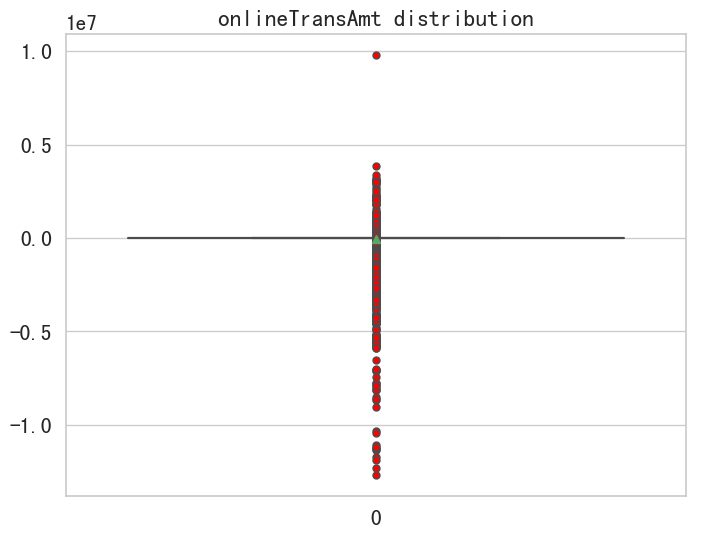

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_table('dataset_new3.txt',sep=' ')
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图查看网上消费金额数据分布
sns.boxplot(data = data['onlineTransAmt'],orient="v",showmeans = True,
            flierprops = {'marker':'o',#异常值形状
                          'markerfacecolor':'red',#形状填充色
                          'color':'black',#形状外廓颜色
                         })
plt.title('onlineTransAmt distribution')

#### 公共事业缴费金额（publicPayAmt）异常值检测与处理

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_table('dataset_new3.txt',sep=' ')
a = data['publicPayAmt']
print(a.describe())
# 对公共事业缴费金额进行异常值检查、处理与盒图绘制
PPA_l = data.loc[data['publicPayAmt']<-6.0000000e+06].filter(items = ['publicPayAmt','publicPayCnt'])
print(PPA_l)
PPA_m = data.loc[data['publicPayAmt']>2.0000000e+06].filter(items = ['publicPayAmt','publicPayCnt'])
print(PPA_m)

# 将公共事业缴费笔数为0时的公共事业缴费金额皆修改为0，更新data
data.loc[data['publicPayCnt']==0,'publicPayAmt'] = 0
# 查看修正后公共事业缴费笔数为0时，公共事业缴费金额与公共事业缴费笔数两列数据
public_after = data[data['publicPayCnt']==0].filter(items=['publicPayAmt','publicPayCnt'])
print(public_after)

# 筛选出公共事业缴费金额在负二百万以上的数据样本,更新data
data = data[data['onlineTransAmt']>-4.000000e+6]
print(data.head())

# 保存更新后的data到dataset_new4.txt
data.to_csv('dataset_new4.txt',sep=' ',index=False)


count    4.733300e+04
mean     5.384408e+02
std      9.383002e+04
min     -6.034950e+06
25%      0.000000e+00
50%      0.000000e+00
75%      1.550000e+03
max      2.944920e+06
Name: publicPayAmt, dtype: float64
     publicPayAmt  publicPayCnt
770    -6034950.0         141.0
       publicPayAmt  publicPayCnt
7140   2.944920e+06    117.000000
25960  2.441313e+06    134.150754
28054  2.310536e+06    138.604497
29235  2.446174e+06    125.980047
34822  2.617109e+06    103.976260
37732  2.056380e+06     86.937739
       publicPayAmt  publicPayCnt
0               0.0           0.0
1               0.0           0.0
3               0.0           0.0
7               0.0           0.0
12              0.0           0.0
...             ...           ...
47320           0.0           0.0
47321           0.0           0.0
47323           0.0           0.0
47327           0.0           0.0
47331           0.0           0.0

[17542 rows x 2 columns]
  CityId  Han   age  card_age  cashAmt_mean  cashAmt_

Text(0.5,1,'publicPayAmt distribution')

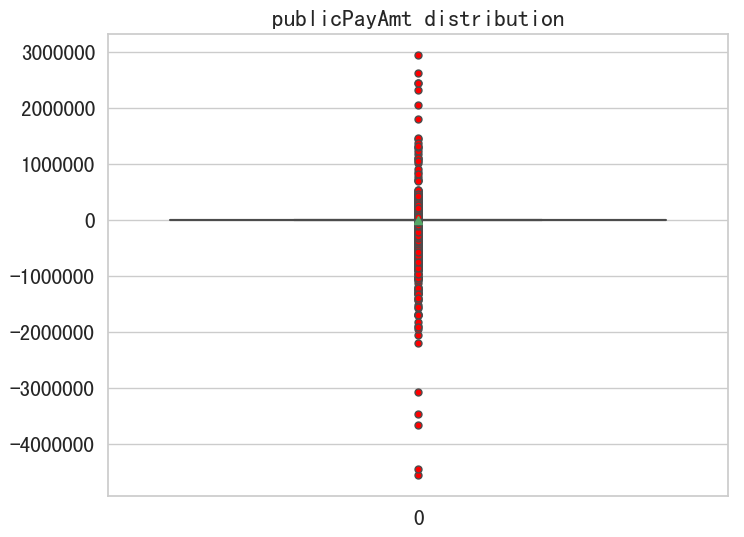

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_table('dataset_new4.txt',sep=' ')
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图查看公共事业缴费金额数据分布
sns.boxplot(data = data['publicPayAmt'],orient="v",showmeans = True,
            flierprops = {'marker':'o',#异常值形状
                          'markerfacecolor':'red',#形状填充色
                          'color':'black',#形状外廓颜色
                         })
plt.title('publicPayAmt distribution')

#### 总消费金额(transTotalAmt)与总消费笔数异常值检测与处理

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_table('dataset_new3.txt',sep=' ')
a = data['transTotalAmt']
b = data['transTotalCnt']
#print(a.describe())
#print(b.describe())
# 对总消费金额(transTotalAmt)进行异常值检查、处理与盒图绘制
TTA_m = data.loc[data['transTotalAmt']>1.000000e+07].filter(items=['transTotalAmt','transTotalCnt'])
print(TTA_m)
TTC_m = data.loc[data['transTotalCnt']>2000].filter(items=['transTotalAmt','transTotalCnt'])
print(TTC_m)

       transTotalAmt  transTotalCnt
15658       10441031            378
       transTotalAmt  transTotalCnt
6397          103650           6789
28299         108168           4002
37055         109154           3395
40389         102494           4850


In [50]:
# 将总消费笔数为0时的总消费金额皆修改为0，更新data
data.loc[data['transTotalCnt']==0,'transTotalAmt'] = 0
# 查看修正后总消费笔数为0时，总消费金额与总消费笔数两列数据
public_after = data[data['transTotalCnt']==0].filter(items=['transTotalAmt','transTotalCnt'])
print(public_after)


       transTotalAmt  transTotalCnt
0                  0              0
7                  0              0
19                 0              0
34                 0              0
49                 0              0
...              ...            ...
47314              0              0
47315              0              0
47318              0              0
47324              0              0
47332              0              0

[8404 rows x 2 columns]


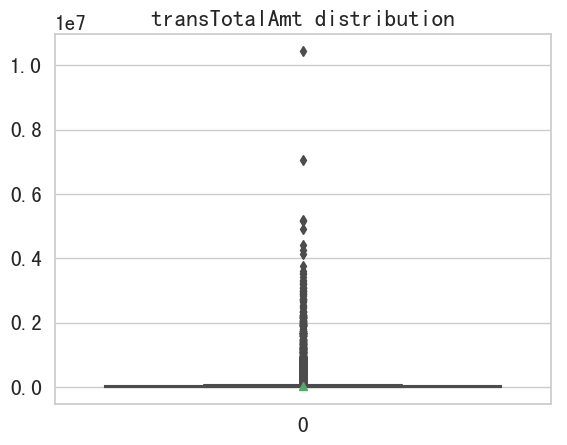

In [51]:
sns.boxplot(data = data['transTotalAmt'],orient="v",showmeans = True)
plt.title('transTotalAmt distribution')
data = data[data['transTotalAmt']<1.0000000e+07]
data.to_csv('dataset_new4.txt',sep=' ',index=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f351350d710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f351351ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3513516c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3513526950>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3513526e90>],
 'means': []}

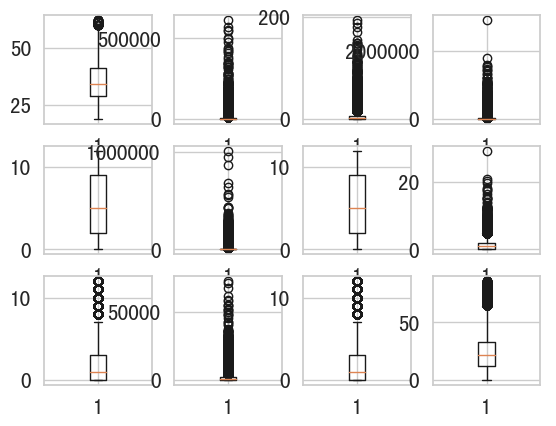

In [52]:
plt.subplot(3,4,1)
plt.boxplot(data['age'])
plt.subplot(3,4,2)
plt.boxplot(data['cashTotalAmt'])
plt.subplot(3,4,3)
plt.boxplot(data['cashTotalCnt'])
plt.subplot(3,4,4)
plt.boxplot(data['monthCardLargeAmt'])
plt.subplot(3,4,5)
plt.boxplot(data['transCnt_non_null_months'])
plt.subplot(3,4,6)
plt.boxplot(data['transAmt_mean'])
plt.subplot(3,4,7)
plt.boxplot(data['transAmt_non_null_months'])
plt.subplot(3,4,8)
plt.boxplot(data['cashCnt_mean'])
plt.subplot(3,4,9)
plt.boxplot(data['cashCnt_non_null_months'])
plt.subplot(3,4,10)
plt.boxplot(data['cashAmt_mean'])
plt.subplot(3,4,11)
plt.boxplot(data['cashAmt_non_null_months'])
plt.subplot(3,4,12)
plt.boxplot(data['card_age'])

### 2.3 离散型特征编码

#### 数字编码

In [53]:
import numpy as np
import pandas as pd
data = pd.read_table('dataset_new4.txt',sep=' ')
# 使用map函数对某列的值进行映射
Dict = {
    '未知':0,'未婚':1,'已婚':2,'小学':1,'初中':2,'高中':3,'本科以上':4,'一致':1,'不一致':2,'0-6个月':1,'6-12个月':2
    ,'12-24个月':3,'24个月以上':4,'男':0,'女':2,'一线城市':1,'二线城市':2,'其它':3
}
data['maritalStatus'] = data['maritalStatus'].map(Dict)
data['education']= data['education'].map(Dict)
data['idVerify']= data['idVerify'].map(Dict)
data['threeVerify']= data['threeVerify'].map(Dict)
data["netLength"] = data['netLength'].map(Dict)
data["sex"] = data['sex'].map(Dict)
data["CityId"] = data['CityId'].map(Dict)

print(data.head())

   CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0       1    0  38.0         2           0.0                        0   
1       1    0  39.0        19           0.0                        0   
2       2    0  40.0        16           0.0                        0   
3       3    0  38.0        13       22000.0                        1   
4       2    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
0           0.0                        0             0             0  ...   
1           0.0                        0             0             0  ...   
2           0.0                        0             0             0  ...   
3           6.0                        1         22000             6  ...   
4           0.0                        0             0             0  ...   

   publicPayCnt  sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0           0.0    2

#### One-Hot编码

In [54]:
import numpy as np
import pandas as pd

data = pd.get_dummies(data,columns=["maritalStatus","education","idVerify","threeVerify","netLength","sex","CityId"])

print(data.columns)

# 保存更新后的data到dataset_new4.txt
data.to_csv('dataset_new4.txt',sep=' ',index=False)

Index(['Han', 'age', 'card_age', 'cashAmt_mean', 'cashAmt_non_null_months',
       'cashCnt_mean', 'cashCnt_non_null_months', 'cashTotalAmt',
       'cashTotalCnt', 'inCourt', 'isBlackList', 'isCrime', 'isDue',
       'monthCardLargeAmt', 'noTransWeekPre', 'onlineTransAmt',
       'onlineTransCnt', 'publicPayAmt', 'publicPayCnt', 'transAmt_mean',
       'transAmt_non_null_months', 'transCnt_mean', 'transCnt_non_null_months',
       'transTotalAmt', 'transTotalCnt', 'Default', 'maritalStatus_0',
       'maritalStatus_1', 'maritalStatus_2', 'education_0', 'education_1',
       'education_2', 'education_3', 'education_4', 'idVerify_0', 'idVerify_1',
       'idVerify_2', 'threeVerify_0', 'threeVerify_1', 'threeVerify_2',
       'netLength_1.0', 'netLength_2.0', 'netLength_3.0', 'netLength_4.0',
       'sex_0', 'sex_2', 'CityId_1', 'CityId_2', 'CityId_3'],
      dtype='object')


## 3.指标计算及模型构建

### 3.1 信用评估指标体系

新增的指标包括：

构造客户的年消费总额，对该客户的消费能力进行初步判断：

      年消费总额=年消费笔数均值×年消费金额均值
构造客户的年取现总额，从侧面评估该客户的总资产：

      年取现总额=年取现笔数均值×年取现金额均值
构造客户平均每笔取现金额，评估客户在资产方面是否具有稳定性：

      平均每笔取现金额=总取现金额/总取现笔数
构造客户网上平均每笔消费金额，评估客户的网络消费习惯：

      网上平均每笔消费额=网上消费金额/网上消费笔数
消费与收入息息相关，构造公共事业平均每笔缴费额，可以更好地衡量客户的消费支出情况：

      公共事业平均每笔缴费额=公共事业缴费金额/公共事业缴费笔数
构造客户的不良记录评分，不良记录越多，分数越高，可以更好地评估客户信用风险：

      不良记录=法院失信传唤记录+有无逾期记录+有无犯罪记录+黑名单接口记录不良记录

### 3.2  新增指标计算并更新数据

In [55]:
import pandas as pd
data = pd.read_table('dataset_new4.txt',sep=' ')

#将总取现笔数、网上消费笔数、公共事业缴费笔数为0时算出来的金额修改为0，否则算出inf影响均值的计算（处理异常值）
data.loc[data['cashTotalCnt']==0,'cashTotalAmt'] = 0
data.loc[data['onlineTransCnt']==0,'onlineTransAmt'] = 0
data.loc[data['publicPayCnt']==0,'publicPayAmt'] = 0

# 计算新增的6个指标，保留到小数点后六位
payYearAmt = data['transCnt_mean']*data['transAmt_mean']
cashYearAmt = data['cashCnt_mean']*data['cashAmt_mean']
aveCash = data['cashTotalAmt']/data['cashTotalCnt']
aveOnline = data['onlineTransAmt']/data['onlineTransCnt']
avePublic = data['publicPayAmt']/data['publicPayCnt']
badRecord = data['inCourt']+data['isDue']+data['isCrime']+data['isBlackList']

# 将结果加在data数据集中的最后几列
data.insert(loc=len(data.columns),column='payYearAmt',value=payYearAmt)
data.insert(loc=len(data.columns),column='cashYearAmt',value=cashYearAmt)
data.insert(loc=len(data.columns),column='aveOnline',value=aveOnline)
data.insert(loc=len(data.columns),column='aveCash',value=aveCash)
data.insert(loc=len(data.columns),column='avePublic',value=avePublic)
data.insert(loc=len(data.columns),column='badRecord',value=badRecord)

#处理零除零为NaN的现象
data.loc[data['cashTotalCnt']==0,'aveCash'] = 0
data.loc[data['onlineTransCnt']==0,'aveOnline'] = 0
data.loc[data['publicPayCnt']==0,'avePublic'] = 0

print(data.head(20))

# 保存更新后的data到dataset_new5.txt
data.to_csv('dataset_new5.txt',sep=' ',index=False)

# 计算特征缺失值个数
na_counts = data.isnull().sum()
# 将na_counts取大于0的部分进行降序排序
missing_value = na_counts[na_counts>0].sort_values(ascending = False)
# 查看存在缺失值的特征
print(missing_value)

    Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  cashCnt_mean  \
0     0  38.0         2      0.000000                        0      0.000000   
1     0  39.0        19      0.000000                        0      0.000000   
2     0  40.0        16      0.000000                        0      0.000000   
3     0  38.0        13  22000.000000                        1      6.000000   
4     0  24.0         8      0.000000                        0      0.000000   
5     0  22.0         9   2100.000000                        1      5.000000   
6     0  33.0        27   1800.000000                        5      3.200000   
7     0  27.0        51      0.000000                        0      0.000000   
8     0  27.0        47   1533.333333                        3      1.666667   
9     0  25.0        32      0.000000                        0      0.000000   
10    0  35.0        12    750.000000                        6      2.000000   
11    0  41.0         2      0.000000   

## 4. 构建风控模型

#### 训练集与测试集划分

In [56]:
!pip install --upgrade pip
!pip install imbalanced-learn==0.6.2

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 5.2 MB/s eta 0:00:00


In [57]:
import pandas as pd
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

data = pd.read_table('dataset_new5.txt',sep=' ')
from sklearn.model_selection import train_test_split

# 将data数据分离为x, y
y = data['Default']
x = data.drop(['Default'],axis = 1,inplace = False)

#预处理
'''x, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.2, 0.8], n_informative=2, n_redundant=0, flip_y=0.01,
                           n_features=20, n_clusters_per_class=1, n_samples=8000, random_state=9)
'''
# 使用train_test_split方法，将x, y划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 4,stratify = y)

# 查看划分后的x_train与x_test的长度
len_x_train = len(x_train)
len_x_test = len(x_test)
print('x_train length: %d, x_test length: %d'%(len_x_train,len_x_test))


#处理类别不平衡问题，采用smote方法过采样
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train_new,y_train_new = smote.fit_resample(x_train,y_train)
x_test_new,y_test_new = smote.fit_resample(x_test,y_test)

print(Counter(y_train_new))

x_train length: 37865, x_test length: 9467
Counter({0.0: 34459, 1.0: 8614})


### 4.1逻辑回归风险评估模型构建及评估

In [58]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score,roc_auc_score
 

# 构建LogisticRegression模型，带入训练集进行训练
lr = LogisticRegression(max_iter=100)
lr.fit(x_train_new,y_train_new)

# 对测试进行预测，计算accuracy、AUC值
y_pred_1 = lr.predict(x_test_new)
test_acc = accuracy_score(y_test_new,y_pred_1)
test_auc = roc_auc_score(y_test_new,y_pred_1)

# 输出评估结果
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)

逻辑回归模型 test_acc: 0.8453110492107706
逻辑回归模型 test_auc: 0.6662024141132776


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### 逻辑回归参数调优

In [59]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score,roc_auc_score

# LogisticRegression模型的参数（penalty/C/class_weight）调优
lr = LogisticRegression(penalty = 'l2',class_weight = 'balanced',max_iter=100,solver = 'liblinear',C=0.7)
lr.fit(x_train_new,y_train_new)
# 对测试进行预测，计算accuracy、AUC值
y_pred_2 = lr.predict(x_test_new)
test_acc = accuracy_score(y_test_new,y_pred_2)
test_auc = roc_auc_score(y_test_new,y_pred_2)

# 输出评估结果
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)


逻辑回归模型 test_acc: 0.803899721448468
逻辑回归模型 test_auc: 0.8095403899721448


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### 数据标准化

In [60]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

data = pd.read_table('dataset_new5.txt',sep=' ')
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt',
'onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt',
'transCnt_non_null_months','transAmt_mean','transAmt_non_null_months',
'cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months',
'card_age', 'payYearAmt','cashYearAmt', 'aveCash','aveOnline',
 'avePublic', 'badRecord']

# 对data中所有连续型的列进行Z-score标准化
data[continuous_columns] = data[continuous_columns].apply(zscore)

# 查看标准化后的数据的均值和标准差
print(data[continuous_columns].mean())
print(data[continuous_columns].std())


# 查看标准化后对模型的效果提升
y = data['Default']
x = data.drop(['Default'],axis = 1,inplace = False)
'''x, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.2, 0.8], n_informative=2, n_redundant=0, flip_y=0.01,
                           n_features=20, n_clusters_per_class=1, n_samples=8000, random_state=9)
'''
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train_new, y_train_new = smote.fit_resample(x_train, y_train)
x_test_new, y_test_new = smote.fit_resample(x_test, y_test)

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# LogisticRegression模型训练及测试评估
lr = LogisticRegression(penalty = 'l2',class_weight = 'balanced',max_iter=200,solver = 'liblinear')
lr.fit(x_train_new,y_train_new)

# 对测试进行预测，计算accuracy、AUC值
y_pred_3 = lr.predict(x_test_new)
test_acc = accuracy_score(y_test_new,y_pred_3)
test_auc = roc_auc_score(y_test_new,y_pred_3)

# 输出评估结果
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)


age                        -4.327883e-15
cashTotalAmt               -7.067037e-16
cashTotalCnt                3.672097e-14
monthCardLargeAmt          -5.014659e-15
onlineTransAmt             -1.193272e-15
onlineTransCnt              3.715968e-15
publicPayAmt                1.172454e-15
publicPayCnt               -2.276667e-15
transTotalAmt              -6.044185e-15
transTotalCnt               1.626280e-16
transCnt_non_null_months    1.685324e-15
transAmt_mean              -7.375064e-15
transAmt_non_null_months    2.581745e-15
cashCnt_mean               -1.995976e-15
cashCnt_non_null_months     2.496619e-16
cashAmt_mean                5.443968e-16
cashAmt_non_null_months     5.238739e-16
card_age                   -3.142962e-16
payYearAmt                  3.966089e-15
cashYearAmt                -3.066005e-15
aveCash                     2.197596e-15
aveOnline                  -1.093269e-15
avePublic                   5.523964e-16
badRecord                   2.579983e-15
dtype: float64
a

#### 连续值离散化

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score
from imblearn.over_sampling import SMOTE

data = pd.read_table('dataset_new5.txt',sep=' ')
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt',
'onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt',
'transCnt_non_null_months','transAmt_mean','transAmt_non_null_months',
'cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months',
'card_age', 'payYearAmt','cashYearAmt', 'aveCash','aveOnline',
 'avePublic', 'badRecord']

# 对data中数值连续型的列进行等频离散化，将每一列都离散为5个组。
for item in continuous_columns:
    data[item] = pd.qcut(data[item],q=5,duplicates='drop')

# 查看离散化后的数据
print(data.head())


# 查看离散化后对模型的效果提升
# 先对各离散组进行One-Hot处理，再进行划分与训练
data = pd.get_dummies(data,columns=['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt',
'onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt',
'transCnt_non_null_months','transAmt_mean','transAmt_non_null_months',
'cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months',
'card_age', 'payYearAmt','cashYearAmt', 'aveCash','aveOnline',
 'avePublic', 'badRecord'])

 # 保存更新后的data到dataset_new6.txt
data.to_csv('dataset_new6.txt',sep=' ',index = False)

# 查看模型预测结果
y = data['Default']
x = data.drop(['Default'],axis = 1,inplace = False)
'''x, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.2, 0.8], n_informative=2, n_redundant=0, flip_y=0.01,
                           n_features=20, n_clusters_per_class=1, n_samples=8000, random_state=9)
'''
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train_new, y_train_new = smote.fit_resample(x_train, y_train)
x_test_new, y_test_new = smote.fit_resample(x_test, y_test)

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# LogisticRegression模型训练及测试评估
lr = LogisticRegression(penalty = 'l2',class_weight = 'balanced',max_iter=500,solver = 'liblinear')
lr.fit(x_train_new,y_train_new)

# 对测试进行预测，计算accuracy、AUC值
y_pred_4 = lr.predict(x_test_new)
test_acc = accuracy_score(y_test_new,y_pred_4)
test_auc = roc_auc_score(y_test_new,y_pred_4)

# 输出评估结果
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)


   Han             age        card_age         cashAmt_mean  \
0    0    (37.0, 43.0]  (-0.001, 10.0]      (-0.001, 150.0]   
1    0    (37.0, 43.0]    (18.0, 25.0]      (-0.001, 150.0]   
2    0    (37.0, 43.0]    (10.0, 18.0]      (-0.001, 150.0]   
3    0    (37.0, 43.0]    (10.0, 18.0]  (2299.0, 72633.333]   
4    0  (18.999, 28.0]  (-0.001, 10.0]      (-0.001, 150.0]   

  cashAmt_non_null_months     cashCnt_mean cashCnt_non_null_months  \
0           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   
1           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   
2           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   
3           (-0.001, 1.0]    (2.0, 29.333]           (-0.001, 1.0]   
4           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   

         cashTotalAmt   cashTotalCnt  inCourt  ...  sex_2  CityId_1  CityId_2  \
0    (-0.001, 1436.0]  (-0.001, 1.0]        0  ...      1         1         0   
1    (-0.001, 1436.0]  (-0.001, 1.0]  

###  4.2随机森林风险评估模型构建及评估

In [62]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import pandas as pd
data = pd.read_table('dataset_new6.txt',sep=' ')
y = data['Default']
x = data.drop(['Default'],axis = 1,inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)

#处理类别不平衡问题，采用smote方法过采样
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train_new,y_train_new = smote.fit_resample(x_train,y_train)
x_test_new,y_test_new = smote.fit_resample(x_test,y_test)

# 构建RandomForestClassifier模型，带入训练集进行训练
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train_new, y_train_new)

# 对测试进行预测，计算accuracy、AUC值
y_pred_5 = rfc.predict(x_test_new)
test_acc = accuracy_score(y_test_new,y_pred_5)
test_auc = roc_auc_score(y_test_new,y_pred_5)

# 输出评估结果
print('随机森林模型 test_acc:',test_acc)
print('随机森林模型 test_auc:',test_auc)

随机森林模型 test_acc: 0.9747446610956361
随机森林模型 test_auc: 0.9422585886722378


#### 随机森林决策树数目参数调优

随机森林模型 test_acc: 0.9714948932219127
随机森林模型 test_auc: 0.9351787372330548


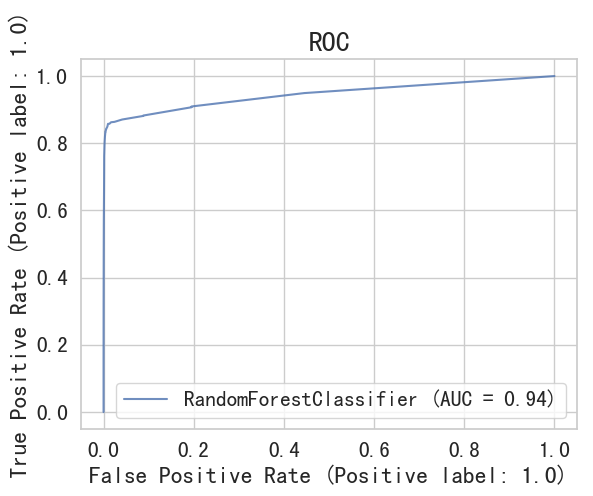

随机森林模型 test_acc: 0.9732590529247911
随机森林模型 test_auc: 0.9397632311977716


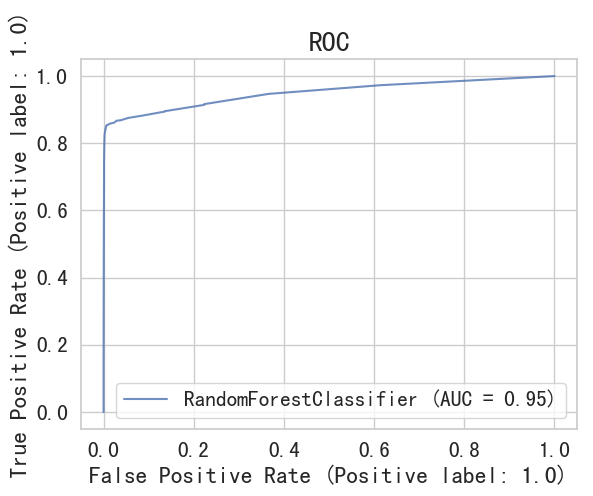

随机森林模型 test_acc: 0.974280408542247
随机森林模型 test_auc: 0.9409238625812444


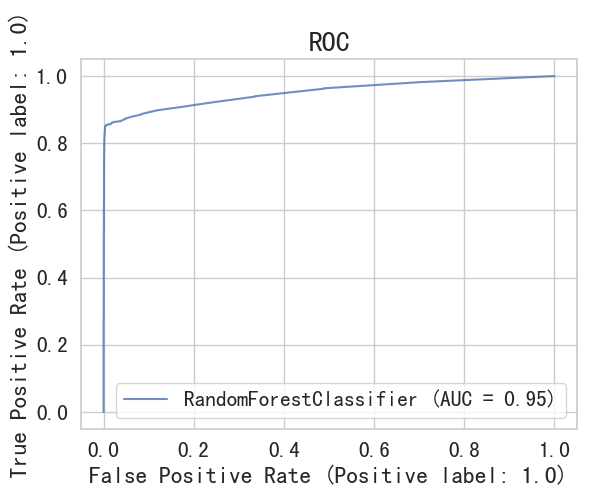

随机森林模型 test_acc: 0.9747446610956361
随机森林模型 test_auc: 0.9422585886722378


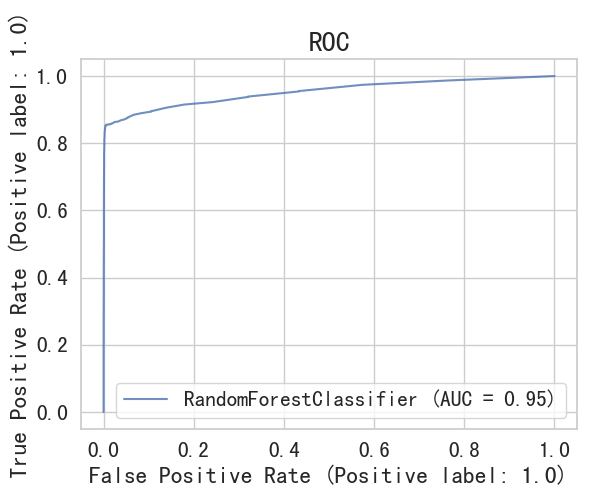

随机森林模型 test_acc: 0.9747446610956361
随机森林模型 test_auc: 0.9422585886722378


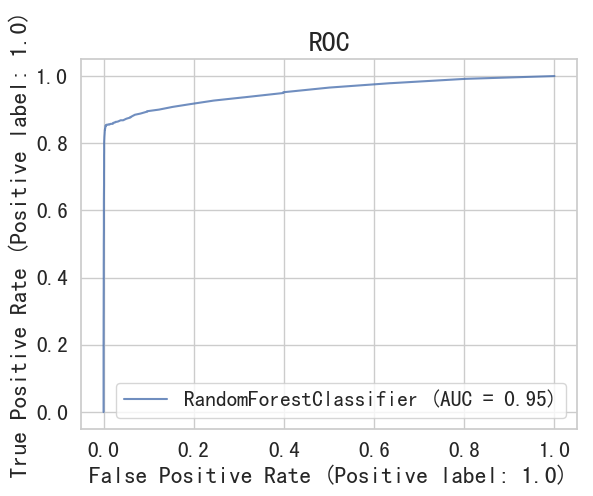

随机森林模型 test_acc: 0.9744661095636026
随机森林模型 test_auc: 0.9415622098421542


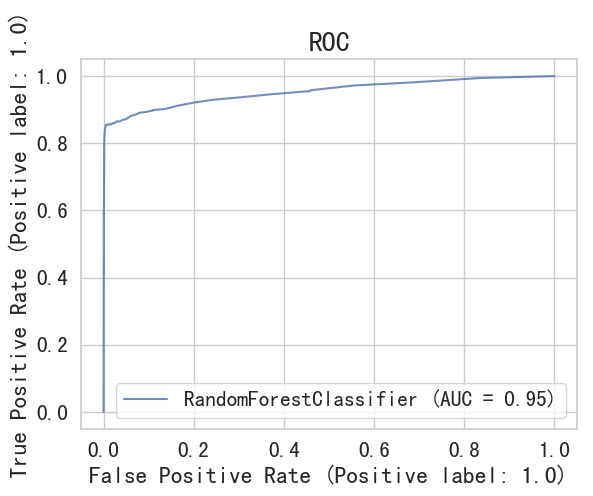

随机森林模型 test_acc: 0.9745589600742804
随机森林模型 test_auc: 0.9416202414113278


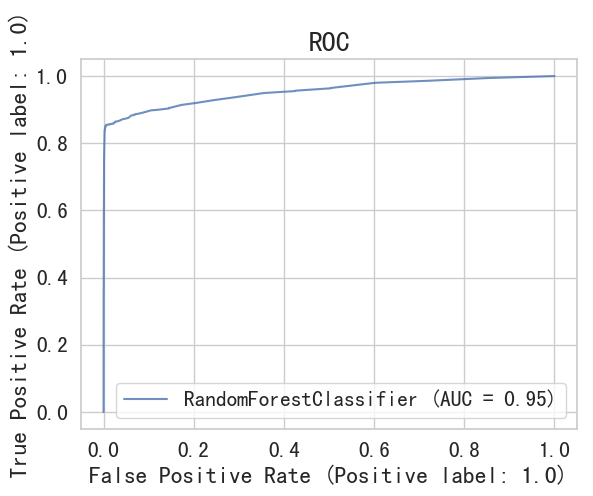

随机森林模型 test_acc: 0.9747446610956361
随机森林模型 test_auc: 0.9419103992571959


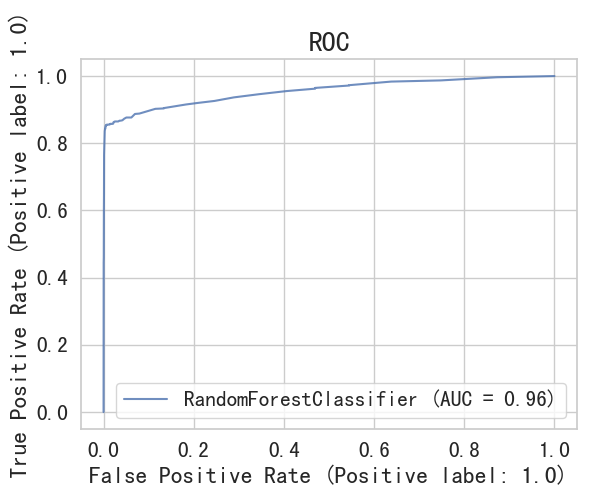

随机森林模型 test_acc: 0.9751160631383473
随机森林模型 test_auc: 0.9431870937790158


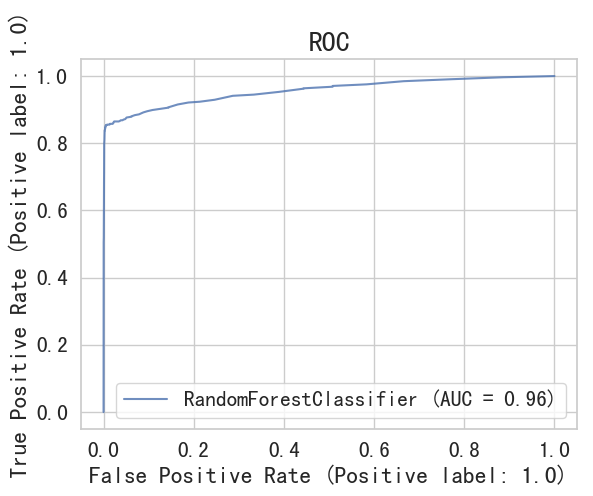

随机森林模型 test_acc: 0.9754874651810584
随机森林模型 test_auc: 0.9439415041782729


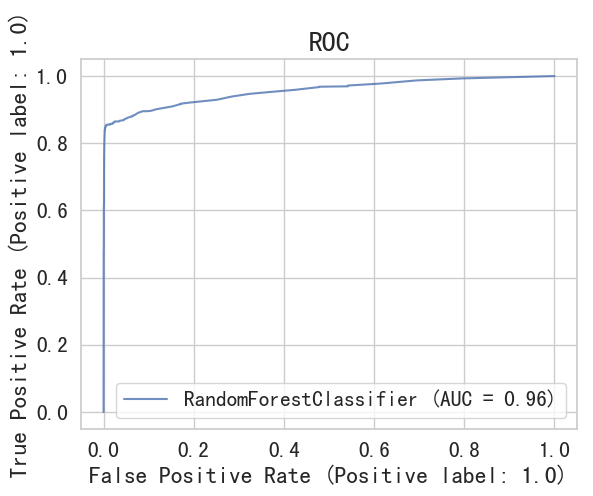

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve

data = pd.read_table('dataset_new6.txt',sep=' ')
y = data['Default']
x = data.drop(['Default'],axis = 1,inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)

#处理类别不平衡问题，采用smote方法过采样
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train_new,y_train_new = smote.fit_resample(x_train,y_train)
x_test_new,y_test_new = smote.fit_resample(x_test,y_test)

# 设置n_estimators在20-200中每隔20取一个数值，计算不同取值时模型在测试样本的AUC值。
for n in range(20,201,20):
    rfc = RandomForestClassifier(random_state=1,n_estimators = n)
    rfc.fit(x_train_new, y_train_new)
    y_pred_6 = rfc.predict(x_test_new)
    test_acc = accuracy_score(y_test_new,y_pred_6)
    test_auc = roc_auc_score(y_test_new,y_pred_6)
# 查看以上模型中在测试集最好的评分
    print('随机森林模型 test_acc:',test_acc)
    print('随机森林模型 test_auc:',test_auc)
# 画出n_estimators与AUC的图形
    ax = plt.gca()
    rfc_disp = plot_roc_curve(rfc, x_test, y_test, ax=ax, alpha=0.8)
    plt.title("ROC",fontsize=20)
    plt.show()
#观察到n_estimators=100最优

#### 使用网格搜索进行随机森林参数调优

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from imblearn.over_sampling import SMOTE

data = pd.read_table('dataset_new6.txt',sep=' ')
y = data['Default']
x = data.drop(['Default'],axis = 1,inplace = False)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify = y)

#处理类别不平衡问题，采用smote方法过采样
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train_new,y_train_new = smote.fit_resample(x_train,y_train)
x_test_new,y_test_new = smote.fit_resample(x_test,y_test)

# 构建随机森林模型，使用网格搜索进行训练及评估
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train_new, y_train_new)
param_grid =[{'n_estimators': [80,100,120,140,160,180],'max_depth': [6,8,10,None]}]
grid_search = GridSearchCV(rfc, param_grid, scoring='roc_auc',n_jobs = 2,cv = 5)
grid_search.fit(x_train_new, y_train_new)
print(grid_search.best_params_, grid_search.best_score_)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': None, 'n_estimators': 180} 0.9910230283097574


In [65]:
rfc = RandomForestClassifier(random_state=1,n_estimators = 180,max_depth = None)
rfc.fit(x_train_new, y_train_new)
y_pred_7 = rfc.predict(x_test_new)
test_acc = accuracy_score(y_test_new,y_pred_7)
test_auc = roc_auc_score(y_test_new,y_pred_7)
print('随机森林模型 test_acc:',test_acc)
print('随机森林模型 test_auc:',test_auc)

随机森林模型 test_acc: 0.9751160631383473
随机森林模型 test_auc: 0.9431870937790158


### 4.4 构建其他风险评估模型并进行评估

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

data = pd.read_table('dataset_new6.txt',sep=' ')
y = data['Default']
x = data.drop('Default',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

#处理类别不平衡问题，采用smote方法过采样
#smote = SMOTE(sampling_strategy=0.25,random_state=42)
#x_train,y_train = smote.fit_resample(x_train,y_train)
#x_test,y_test = smote.fit_resample(x_test,y_test)

#构建神经网络模型
#调参之前
mlp = MLPClassifier(verbose = True,random_state=0)
mlp.fit(x_train, y_train)

#打印分数评估
score = mlp.score(x_test, y_test)
print('调参之前的分数：',score)
#调参之后
mlp = MLPClassifier(solver='adam', activation='logistic',verbose = True,hidden_layer_sizes=[10,10,10],
 random_state=0,warm_start = True,early_stopping = True)
mlp.fit(x_train, y_train)
#打印分数评估
score = mlp.score(x_test, y_test)
print('调参之后的分数：',score)

Iteration 1, loss = 0.22482249
Iteration 2, loss = 0.13815891
Iteration 3, loss = 0.12736308
Iteration 4, loss = 0.12131683
Iteration 5, loss = 0.11654112
Iteration 6, loss = 0.11182790
Iteration 7, loss = 0.10889231
Iteration 8, loss = 0.10513042
Iteration 9, loss = 0.10315182
Iteration 10, loss = 0.10078245
Iteration 11, loss = 0.09932054
Iteration 12, loss = 0.09585813
Iteration 13, loss = 0.09324537
Iteration 14, loss = 0.09148006
Iteration 15, loss = 0.09087020
Iteration 16, loss = 0.08750625
Iteration 17, loss = 0.08570756
Iteration 18, loss = 0.08377824
Iteration 19, loss = 0.08222287
Iteration 20, loss = 0.08161916
Iteration 21, loss = 0.08001290
Iteration 22, loss = 0.07783496
Iteration 23, loss = 0.07541702
Iteration 24, loss = 0.07369805
Iteration 25, loss = 0.07211684
Iteration 26, loss = 0.07265774
Iteration 27, loss = 0.07096777
Iteration 28, loss = 0.06867100
Iteration 29, loss = 0.06705449
Iteration 30, loss = 0.06511369
Iteration 31, loss = 0.06415074
Iteration 32, los

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


调参之前的分数： 0.9695785359670435
Iteration 1, loss = 0.57669087
Validation score: 0.909955
Iteration 2, loss = 0.34966332
Validation score: 0.909955
Iteration 3, loss = 0.30962796
Validation score: 0.909955
Iteration 4, loss = 0.30345816
Validation score: 0.909955
Iteration 5, loss = 0.30193003
Validation score: 0.909955
Iteration 6, loss = 0.29356787
Validation score: 0.909955
Iteration 7, loss = 0.27653292
Validation score: 0.909955
Iteration 8, loss = 0.24998270
Validation score: 0.909955
Iteration 9, loss = 0.21706009
Validation score: 0.909955
Iteration 10, loss = 0.18614304
Validation score: 0.909955
Iteration 11, loss = 0.16283866
Validation score: 0.959071
Iteration 12, loss = 0.14753385
Validation score: 0.963560
Iteration 13, loss = 0.13833230
Validation score: 0.964616
Iteration 14, loss = 0.13275871
Validation score: 0.965408
Iteration 15, loss = 0.12884428
Validation score: 0.964880
Iteration 16, loss = 0.12612042
Validation score: 0.967256
Iteration 17, loss = 0.12382162
Valid

### 5.风险评估模型预测及分析

### 5.1模型评价指标

在这个项目中，我们将从准确性、稳定性、可解释性三个方面对模型进行评估。

1）准确性：包含两个指标，分别为ROC曲线和KS检验，它们均为风控模型中的常用评估指标。ROC曲线通过真正率TPR和假正率FPR两个指标进行绘制，并且它与横轴之间的面积AUC值可以度量模型的准确性。ROC曲线具有一定的稳定性，它不会因为正负样本分布的变化而产生不同的曲线。 在统计学中，KS检验基于累计分布函数，用以检验两个经验分布是否不同或一个经验分布与另一个理想分布是否不同。在风控模型的开发中，KS检验可以评估风控模型对正常和违约用户的区分能力，是一种区分度评价指标。

2）稳定性：模型是在特定时间点开发的，是否对外部样本有效需要经过稳定性测试。群体稳定性指标（population stability index，PSI）是最常用的模型稳定性评价指标。

3）可解释性：在逻辑回归和随机森林模型中，考量各个解释变量对目标变量预测结果的影响程度，可以得到模型指标重要性。

### 5.2逻辑回归模型评价

#### ROC曲线与AUC

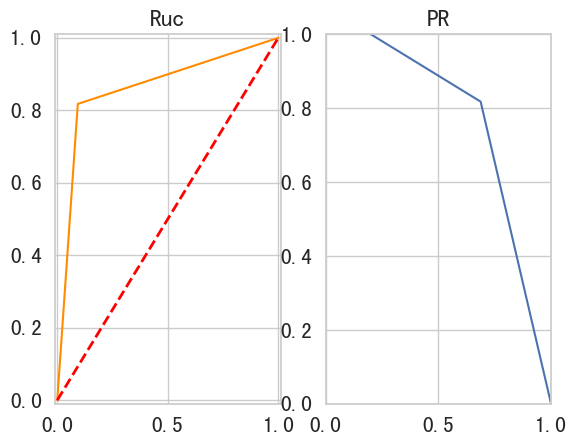

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,precision_recall_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

data = pd.read_table('dataset_new6.txt',sep=' ')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 33,stratify=y)

#处理类别不平衡问题，采用smote方法过采样
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

# 使用调优的参数训练逻辑回归模型
lr = LogisticRegression(penalty = 'l2',C=0.7,class_weight = 'balanced',max_iter=100
,solver = 'liblinear')
lr.fit(x_train,y_train)
y_pred_best = lr.predict(x_test)
# 使用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred_best)
# 使用metrics.auc求出roc_auc的值
roc_auc = metrics.auc(fpr,tpr)
 
# 绘制ROC曲线
plt.figure(20)
plt.subplot(1,2,1)
plt.xlim([-0.01, 1.01]) 
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc) 
###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('Ruc')
 
# 绘制PR曲线
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_best)
plt.subplot(1,2,2)
plt.plot(precision, recall)
idx=np.argwhere(precision-recall==0)
plt.scatter(precision[idx],recall[idx],c="r")
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('PR')
plt.show()
 

#### KS值

KS值： 72.47 % 阈值： 1.0


Text(0.25,0.43,'KS')

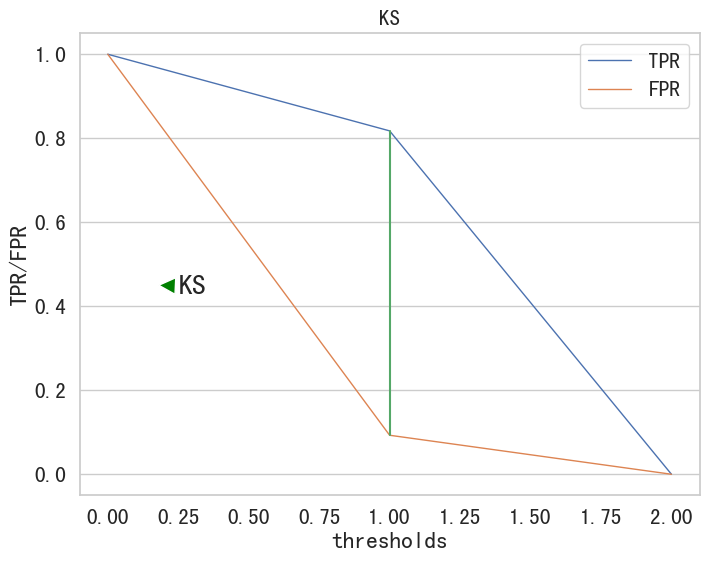

In [72]:
ks = max(abs(tpr-fpr))
thre = threshold[abs(tpr-fpr).argmax()]

ks = round(ks*100, 2)
thre = round(thre, 2)
print('KS值：', ks,  '%', '阈值：', thre)
 
#将图片大小设为8:6
fig = plt.figure(figsize=(8,6))
#将plt.plot里的内容填写完整
 
plt.plot(threshold[::-1], tpr[::-1], lw=1, alpha=1,label='TPR')
plt.plot(threshold[::-1], fpr[::-1], lw=1, alpha=1,label='FPR')
 
 
#画出KS值的直线
ks_tpr = tpr[abs(tpr-fpr).argmax()]
ks_fpr = fpr[abs(tpr-fpr).argmax()]
x1 = [thre, thre]
x2 = [ks_fpr, ks_tpr]
plt.plot(x1, x2)
 
#设置横纵名称以及图例
plt.xlabel('thresholds')
plt.ylabel('TPR/FPR')
plt.title('KS', fontsize=15)
plt.legend(loc="upper right")
plt.grid(axis='x')
 
# 在图上标注ks值
plt.annotate('KS', xy=(0.18, 0.45), xytext=(0.25, 0.43),
             fontsize=20,arrowprops=dict(facecolor='green', shrink=0.01))

#### 模型稳定性PSI

psi= <bound method Series.sum of 0    2.145539e-08
1    2.010898e-04
2    1.314266e-06
3    3.110638e-06
4    1.897949e-04
5    2.268825e-05
6    4.710190e-04
7    5.216208e-04
8    2.253873e-04
9    3.963582e-04
dtype: float64>


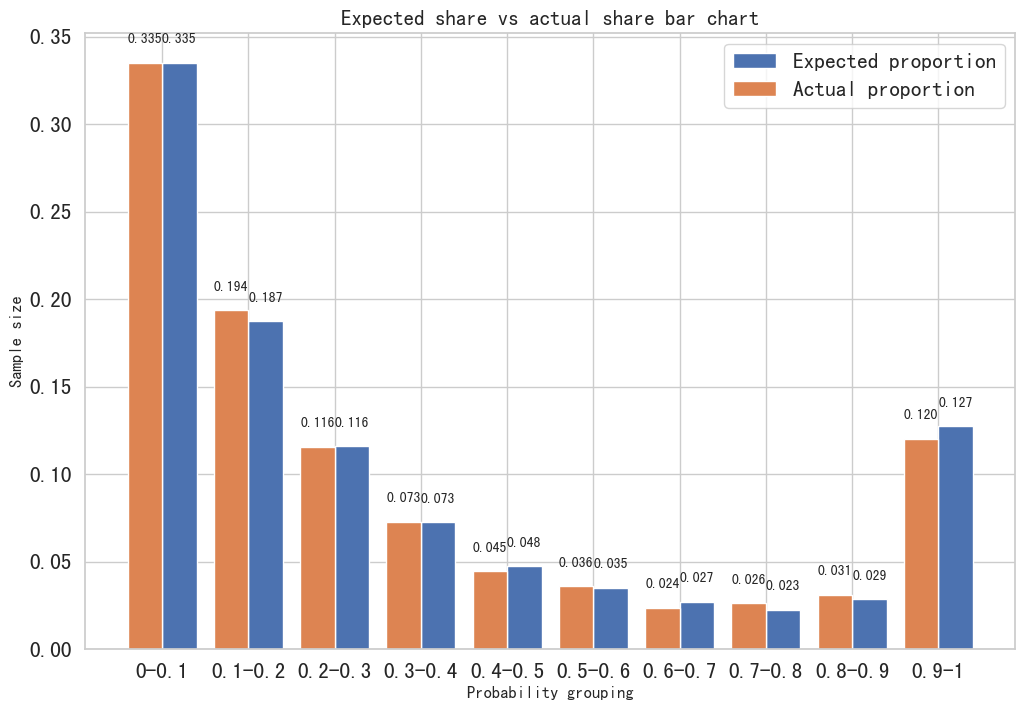

In [73]:
## 训练集预测概率
y_train_probs = lr.predict_proba(x_train_new)[:,1]
## 测试集预测概率
y_test_probs = lr.predict_proba(x_test_new)[:,1]
 
def psi(y_train_probs, y_test_probs):
    ## 设定每组的分点
    bins = np.arange(0, 1.1, 0.1)
    
    ## 将训练集预测概率分组
    y_train_probs_cut = pd.cut(y_train_probs, bins=bins, labels=False)
    ## 计算预期占比
    expect_prop = (pd.Series(y_train_probs_cut).value_counts()/len(y_train_probs)).sort_index()
    
    ## 将测试集预测概率分组
    y_test_probs_cut = pd.cut(y_test_probs, bins=bins, labels=False)
    ## 计算实际占比
    actual_prop = (pd.Series(y_test_probs_cut).value_counts()/len(y_test_probs)).sort_index()
    
    ## 计算PSI
    psi = ((actual_prop-expect_prop)*np.log(actual_prop/expect_prop)).sum
    
    return psi, expect_prop, actual_prop
 
## 运行函数得到psi、预期占比和实际占比
psi, expect_prop, actual_prop = psi(y_train_probs,y_test_probs)
print('psi=',psi)
 
## 创建(12, 8)的绘图框
fig = plt.figure(figsize=(12, 8))
 
## 绘制条形图
plt.bar(expect_prop.index + 0.2, expect_prop, width=0.4, label='Expected proportion')
plt.bar(actual_prop.index - 0.2, actual_prop, width=0.4, label='Actual proportion')
plt.legend()
 
## 设置轴标签
plt.xlabel('Probability grouping', fontsize=12)
plt.ylabel('Sample size', fontsize=12)
 
## 设置轴刻度
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1'])
 
## 设置图标题
plt.title('Expected share vs actual share bar chart', fontsize=15)
 
## 在图上添加文字
for index, item1, item2 in zip(range(10), expect_prop.values, actual_prop.values): 
    plt.text(index+0.2, item1 + 0.01, '%.3f' % item1, ha="center", va= "bottom",fontsize=10)
    plt.text(index-0.2, item2 + 0.01, '%.3f' % item2, ha="center", va= "bottom",fontsize=10)
 
 

#### 模型指标重要性

                                              0
transCnt_mean                          0.000461
cashCnt_non_null_months_(2.0, 4.0]     0.000793
cashAmt_non_null_months_(2.0, 4.0]     0.005273
threeVerify_2                          0.015860
transAmt_non_null_months_(10.0, 12.0]  0.016418
...                                         ...
cashTotalCnt_(-0.001, 1.0]             1.272826
onlineTransCnt_(-0.001, 2.0]           1.622148
onlineTransCnt_(46.0, 6792.0]          1.833436
cashYearAmt_(-0.001, 31.612]           1.845038
cashTotalCnt_(8.0, 194.0]              2.308513

[127 rows x 1 columns]


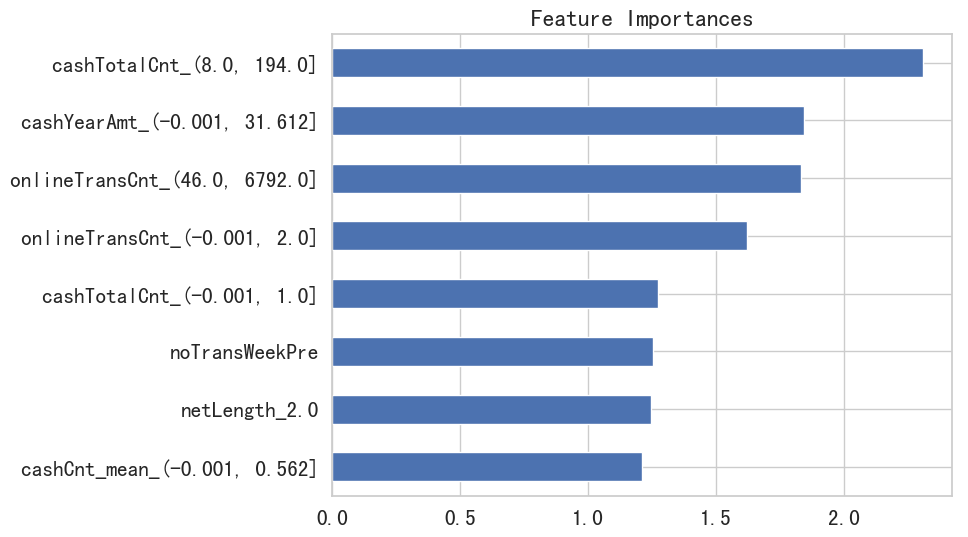

In [74]:
# 查看逻辑回归各项指标系数
coefficient = lr.coef_
#print(coefficient.shape)
# 取出指标系数，并对其求绝对值
importance = abs(coefficient)
 
# 通过图形的方式直观展现前八名的重要指标
index=data.drop('Default', axis=1).columns
feature_importance = pd.DataFrame(importance.T, index=index).sort_values(by=0, ascending=True)
 
# # 查看指标重要度
print(feature_importance)
 
# 水平条形图绘制
feature_importance.tail(8).plot(kind='barh', title='Feature Importances', figsize=(8, 6), legend=False)
plt.show()

### 5.3随机森林模型评价

KS值： 90.2 % 阈值： 1.0
psi= <bound method Series.sum of 0.0    0.035655
1.0    0.028824
2.0    0.004642
3.0    0.007639
4.0    0.011679
5.0    0.018393
6.0    0.001949
7.0    0.042584
8.0    0.022136
9.0    0.046986
dtype: float64>
feature_importance:                                       0
badRecord_(-0.001, 4.0]        0.000000
isCrime                        0.000701
Han                            0.000743
inCourt                        0.000946
isBlackList                    0.000954
...                                 ...
onlineTransCnt_(-0.001, 2.0]   0.024443
age_(43.0, 62.0]               0.033754
onlineTransCnt_(46.0, 6792.0]  0.036560
cashTotalCnt_(8.0, 194.0]      0.060165
noTransWeekPre                 0.158024

[127 rows x 1 columns]


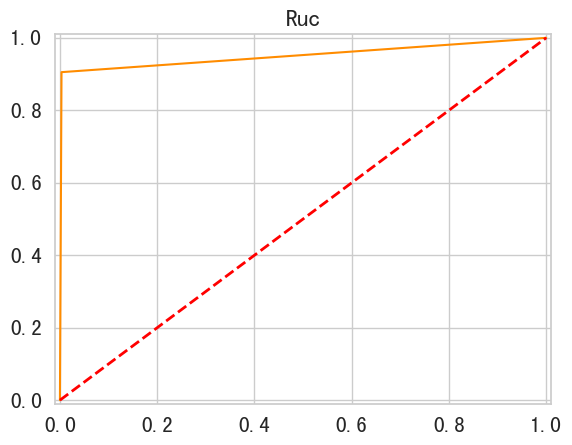

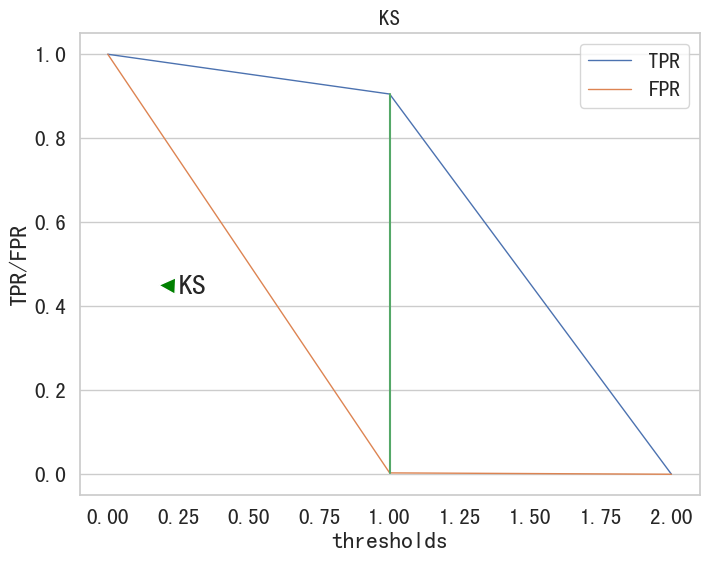

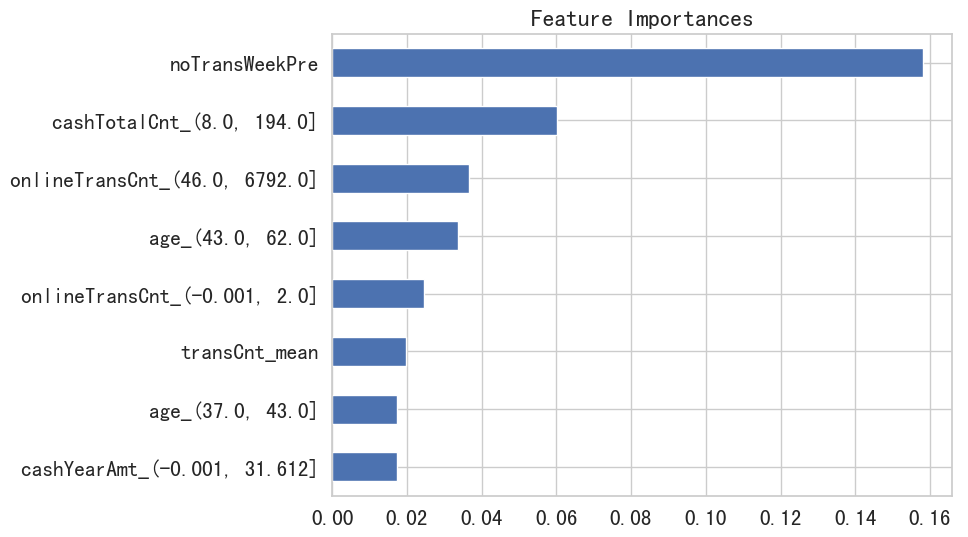

In [76]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from imblearn.over_sampling import SMOTE

data = pd.read_table('dataset_new6.txt',sep=' ')
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 33,stratify=y)

#处理类别不平衡问题，采用smote方法过采样
smote = SMOTE(sampling_strategy=0.25,random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)
x_test,y_test = smote.fit_resample(x_test,y_test)

# 使用调优的参数训练随机森林模型
rfc = RandomForestClassifier(random_state=1,n_estimators = 180,max_depth = None)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

# 计算roc_auc值，并绘制ROC曲线
# 使用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
# 使用metrics.auc求出roc_auc的值
roc_auc = metrics.auc(fpr,tpr)
 
# 绘制ROC曲线
plt.figure(20)
plt.xlim([-0.01, 1.01]) 
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc) 
###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('Ruc')

 
# 求出KS值和相应的阈值
ks = max(abs(fpr-tpr))
thre = threshold[abs(fpr-tpr).argmax()]

ks = round(ks*100, 2)
thre = round(thre, 2)
print('KS值：', ks,  '%', '阈值：', thre)

# 绘制真正率TPR与假正率FPR两条线


# 画出KS值的直线
#将图片大小设为8:6
fig = plt.figure(figsize=(8,6))
#将plt.plot里的内容填写完整
plt.plot(threshold[::-1], tpr[::-1], lw=1, alpha=1,label='TPR')
plt.plot(threshold[::-1], fpr[::-1], lw=1, alpha=1,label='FPR')
ks_tpr = tpr[abs(tpr-fpr).argmax()]
ks_fpr = fpr[abs(tpr-fpr).argmax()]
x1 = [thre, thre]
x2 = [ks_fpr, ks_tpr]
plt.plot(x1, x2)
 
#设置横纵名称以及图例
plt.xlabel('thresholds')
plt.ylabel('TPR/FPR')
plt.title('KS', fontsize=15)
plt.legend(loc="upper right")
plt.grid(axis='x')
 
# 在图上标注ks值
plt.annotate('KS', xy=(0.18, 0.45), xytext=(0.25, 0.43),
             fontsize=20,arrowprops=dict(facecolor='green', shrink=0.01))

# 训练集预测概率
y_train_probs = rfc.predict_proba(x_train)[:,1]
# 测试集预测概率
y_test_probs = rfc.predict_proba(x_test)[:,1]

def psi(y_train_probs, y_test_probs):
    ## 设定每组的分点
    bins = np.arange(0, 1.1, 0.1)
    
    ## 将训练集预测概率分组
    y_train_probs_cut = pd.cut(y_train_probs, bins=bins, labels=False)
    ## 计算预期占比
    expect_prop = (pd.Series(y_train_probs_cut).value_counts()/len(y_train_probs)).sort_index()
    
    ## 将测试集预测概率分组
    y_test_probs_cut = pd.cut(y_test_probs, bins=bins, labels=False)
    ## 计算实际占比
    actual_prop = (pd.Series(y_test_probs_cut).value_counts()/len(y_test_probs)).sort_index()
    
    ## 计算PSI
    psi = ((actual_prop-expect_prop)*np.log(actual_prop/expect_prop)).sum
    
    return psi, expect_prop, actual_prop

#调用psi函数得到psi值
psi, expect_prop, actual_prop = psi(y_train_probs,y_test_probs)
print('psi=',psi)


# 查看随机森林各项指标系数
importance = rfc.feature_importances_

# 通过图形的方式直观展现前八名的重要指标
index=data.drop('Default', axis=1).columns
feature_importance = pd.DataFrame(importance.T, index=index).sort_values(by=0, ascending=True)

# # 查看指标重要度
print('feature_importance:',feature_importance)

# 水平条形图绘制
feature_importance.tail(8).plot(kind='barh', title='Feature Importances', figsize=(8, 6), legend=False)
plt.show()


### 5.4神经网络模型评价

Iteration 1, loss = 0.57668848
Validation score: 0.909955
Iteration 2, loss = 0.34966228
Validation score: 0.909955
Iteration 3, loss = 0.30962712
Validation score: 0.909955
Iteration 4, loss = 0.30345325
Validation score: 0.909955
Iteration 5, loss = 0.30176872
Validation score: 0.909955
Iteration 6, loss = 0.29265119
Validation score: 0.909955
Iteration 7, loss = 0.27474187
Validation score: 0.909955
Iteration 8, loss = 0.24687903
Validation score: 0.909955
Iteration 9, loss = 0.21287676
Validation score: 0.909955
Iteration 10, loss = 0.18159568
Validation score: 0.909955
Iteration 11, loss = 0.15816748
Validation score: 0.960919
Iteration 12, loss = 0.14319214
Validation score: 0.962239
Iteration 13, loss = 0.13408241
Validation score: 0.962239
Iteration 14, loss = 0.12816531
Validation score: 0.963560
Iteration 15, loss = 0.12416586
Validation score: 0.963560
Iteration 16, loss = 0.12100158
Validation score: 0.966200
Iteration 17, loss = 0.11845485
Validation score: 0.967256
Iterat

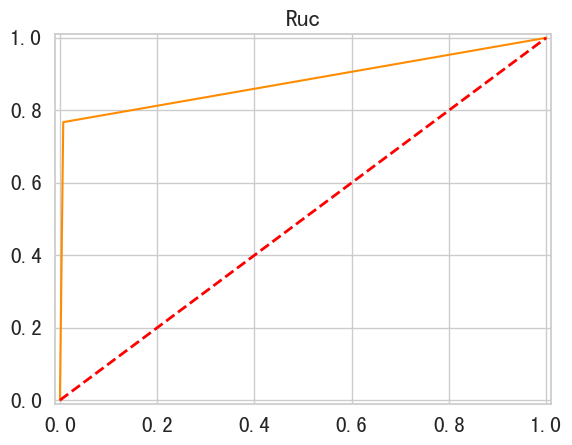

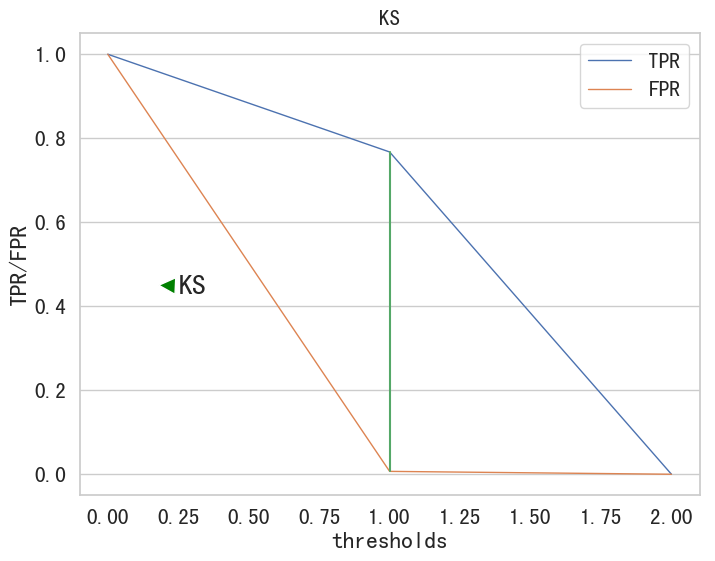

In [78]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
from imblearn.over_sampling import SMOTE

data = pd.read_table('dataset_new6.txt',sep=' ')
y = data['Default']
x = data.drop(['Default'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 33,stratify=y)

# 使用调优的参数训练神经网络模型
mlp = MLPClassifier(solver='adam', activation='logistic',verbose = True,hidden_layer_sizes=[10,10,10],
                    random_state=0,warm_start = True,early_stopping = True)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
score = mlp.score(x_test, y_test)
print('得到的分数为:',score)
# 计算roc_auc值，并绘制ROC曲线
# 使用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
# 使用metrics.auc求出roc_auc的值
roc_auc = metrics.auc(fpr,tpr)
 
# 绘制ROC曲线
plt.figure(20)
plt.xlim([-0.01, 1.01]) 
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc) 
###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('Ruc')

 
# 求出KS值和相应的阈值
ks = max(abs(fpr-tpr))
thre = threshold[abs(fpr-tpr).argmax()]

ks = round(ks*100, 2)
thre = round(thre, 2)
print('KS值：', ks,  '%', '阈值：', thre)

# 绘制真正率TPR与假正率FPR两条线


# 画出KS值的直线
#将图片大小设为8:6
fig = plt.figure(figsize=(8,6))
#将plt.plot里的内容填写完整
plt.plot(threshold[::-1], tpr[::-1], lw=1, alpha=1,label='TPR')
plt.plot(threshold[::-1], fpr[::-1], lw=1, alpha=1,label='FPR')
ks_tpr = tpr[abs(tpr-fpr).argmax()]
ks_fpr = fpr[abs(tpr-fpr).argmax()]
x1 = [thre, thre]
x2 = [ks_fpr, ks_tpr]
plt.plot(x1, x2)
 
#设置横纵名称以及图例
plt.xlabel('thresholds')
plt.ylabel('TPR/FPR')
plt.title('KS', fontsize=15)
plt.legend(loc="upper right")
plt.grid(axis='x')
 
# 在图上标注ks值
plt.annotate('KS', xy=(0.18, 0.45), xytext=(0.25, 0.43),
             fontsize=20,arrowprops=dict(facecolor='green', shrink=0.01))

# 训练集预测概率
y_train_probs = mlp.predict_proba(x_train)[:,1]
# 测试集预测概率
y_test_probs = mlp.predict_proba(x_test)[:,1]

def psi(y_train_probs, y_test_probs):
    ## 设定每组的分点
    bins = np.arange(0, 1.1, 0.1)
    
    ## 将训练集预测概率分组
    y_train_probs_cut = pd.cut(y_train_probs, bins=bins, labels=False)
    ## 计算预期占比
    expect_prop = (pd.Series(y_train_probs_cut).value_counts()/len(y_train_probs)).sort_index()
    
    ## 将测试集预测概率分组
    y_test_probs_cut = pd.cut(y_test_probs, bins=bins, labels=False)
    ## 计算实际占比
    actual_prop = (pd.Series(y_test_probs_cut).value_counts()/len(y_test_probs)).sort_index()
    
    ## 计算PSI
    psi = ((actual_prop-expect_prop)*np.log(actual_prop/expect_prop)).sum
    
    return psi, expect_prop, actual_prop

#调用psi函数得到psi值
psi, expect_prop, actual_prop = psi(y_train_probs,y_test_probs)
print('psi=',psi)

In [79]:
!pip install eli5

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 773.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=37168abe78574202a2540cd75136c101cdb0e04f9534165677e1ecb19d3fa70a
  Stored in directory: /home/aistudio/.cache/pip/wheels/2c/f9/76/f034f5d43a1908ae1d89acd0fdefc7e8ac2c3632319a5d104c
Successfully built eli5


In [81]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(mlp,random_state = 1).fit(x_test,y_test)
eli5.show_weights(perm,feature_names = x_test.columns.tolist())

Weight,Feature
0.0194 ± 0.0008,"cashTotalCnt_(8.0, 194.0]"
0.0153 ± 0.0012,"onlineTransCnt_(46.0, 6792.0]"
0.0150 ± 0.0007,"onlineTransCnt_(-0.001, 2.0]"
0.0103 ± 0.0009,"cashTotalCnt_(-0.001, 1.0]"
0.0066 ± 0.0013,"onlineTransCnt_(10.0, 46.0]"
0.0065 ± 0.0014,"payYearAmt_(15112.14, 19534255.004]"
0.0062 ± 0.0017,"age_(28.0, 32.0]"
0.0060 ± 0.0018,"onlineTransCnt_(2.0, 10.0]"
0.0057 ± 0.0007,"transAmt_mean_(5568.524, 1009315.714]"
0.0049 ± 0.0006,"cashTotalCnt_(1.0, 3.0]"
